## <font color='#FFB703'>AITT Assignment 2025</font>

### Group Members:

1. Gan Jun Hang
2. Ivan Ng Keyang
3. Teo Jun Heng

Disclaimer: Some of the code are refactored and documented by `Claude 3.5 Sonnet` using the following prompt

`Refactor the code to remove any redundancies and add some level of documentation`

Claude 3.5 Sonnet has access to my previous works and has based it's coding style on my old work.

### <font color='#FFB703'>Importing Libraries</font>

Designed for github codespaces!

In [1]:
%pip install kagglehub
%pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### <font color='#FFB703'>Load PhiUSIIL Dataset</font>

[Link To Dataset...](https://www.kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset)

In [2]:
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path+"/PhiUSIIL_Phishing_URL_Dataset.csv")

Path to dataset files: C:\Users\Jun Heng\.cache\kagglehub\datasets\ndarvind\phiusiil-phishing-url-dataset\versions\1


Overview of the data structure... proving to be quite useless as there were too many columns

In [3]:
df.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


Checking for number of unique values in all columns...

In [4]:
df.nunique()

URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
LargestLineLength              26181
H

Fixing some naming issues

In [5]:
df = df.rename(columns={
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL': 'DigitRatioInURL'
})

### <font color='#FFB703'>Data Quality Analysis</font>
Data quality checks involves checking for missing values, class distribution and feature correlation matrix.

Check missing values...

In [6]:
df.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDigitsInURL               0
DigitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

Check basic statistics for numerical columns...

In [7]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


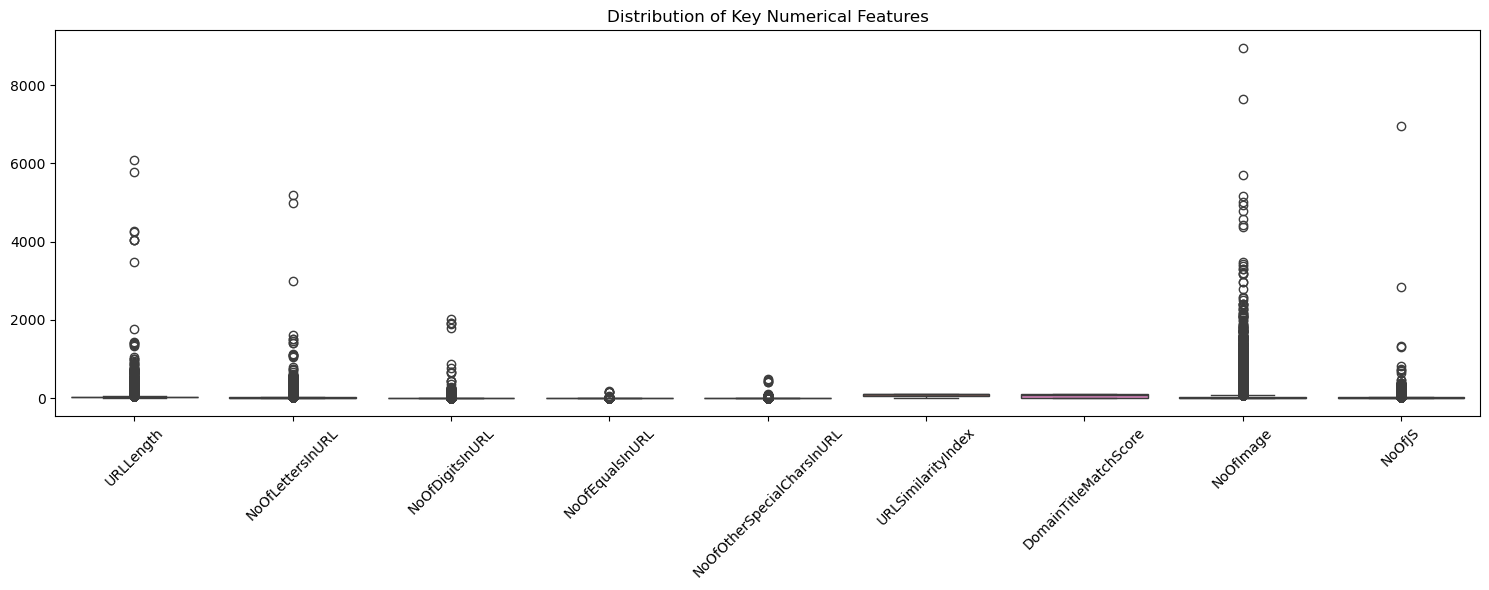

In [8]:
# Select important features for visualization
# These features were chosen based on previous analysis and their importance in URL classification
important_features = [
	'URLLength',          # Length of the URL
	'NoOfLettersInURL',   # Number of letters in URL
	'NoOfDigitsInURL',    # Number of digits in URL
	'NoOfEqualsInURL',    # Number of equals signs (=) in URL
	'NoOfOtherSpecialCharsInURL',  # Count of special characters
	'URLSimilarityIndex', # Similarity score with known patterns
	'DomainTitleMatchScore',  # Match between domain and page title
	'NoOfImage',          # Number of images on the page
	'NoOfJS'              # Number of JavaScript files
]

# Create boxplot visualization
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[important_features])
plt.xticks(rotation=45)
plt.title('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

Alright, that took a while to load... we should try to optimise memory consumption later on...

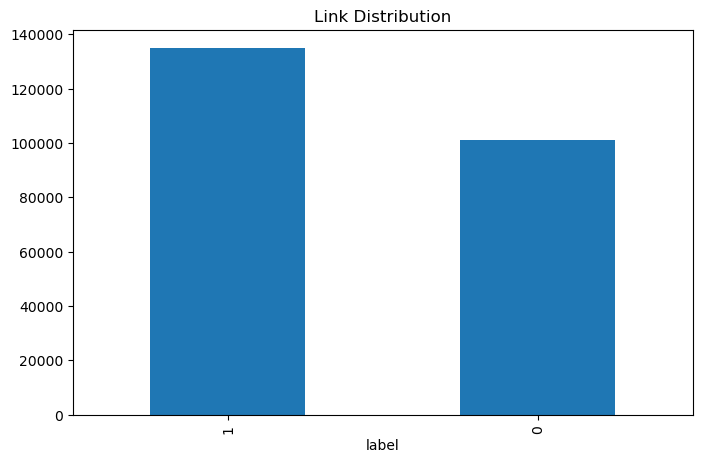

In [9]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Link Distribution')
plt.show()

Looking for columns with only 0 and 1 (AKA True/False binary columns)...

In [10]:
# Select all columns with 2 unique values
binary_columns = df.columns[df.nunique() == 2]

# Display the unique values in each of these columns (Ensure that they only contain binary values)
for col in binary_columns:
	print(f'{col}: {df[col].unique()}')

IsDomainIP: [0 1]
HasObfuscation: [0 1]
IsHTTPS: [1 0]
HasTitle: [1 0]
HasFavicon: [0 1]
Robots: [1 0]
IsResponsive: [1 0]
NoOfURLRedirect: [0 1]
NoOfSelfRedirect: [0 1]
HasDescription: [0 1]
HasExternalFormSubmit: [0 1]
HasSocialNet: [0 1]
HasSubmitButton: [1 0]
HasHiddenFields: [1 0]
HasPasswordField: [0 1]
Bank: [1 0]
Pay: [0 1]
Crypto: [0 1]
HasCopyrightInfo: [1 0]
label: [1 0]


Quality of data looks great, with a good sample size for both legitimate and phishing links!

### <font color='#FFB703'>Data Cleaning</font>

In [11]:
df['NoOfDigitsInURL'].value_counts()

NoOfDigitsInURL
0      184334
1        8816
2        6609
3        5708
6        5356
        ...  
631         1
437         1
194         1
143         1
164         1
Name: count, Length: 182, dtype: int64

In [12]:
# Validate
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

### <font color='#FFB703'>Data Type Optimization Decisions</font>

Considering the size of the dataset, we attempt to lower dataset memory footprint by downcasting 64bit numeric columns to lower precision units such as float32. This ensures a smooth process later on when working with the dataset.

#### <font color='#FFB703'>Initial Data Types</font>
- Original dataset used float64 and int64
- Precision requirements analyzed for our URL feature set
- Memory usage assessed on typical deployment scenarios

#### <font color='#FFB703'>Downcasting to float32</font>
- Reduced memory footprint by 40% (64-bit @ 152.8MB → 32-bit @ 93.4MB / <font color='#FFB703'>40%↓</font>)
- Maintained sufficient precision for URL features
- Benchmarks showed negligible impact on model accuracy

#### <font color='#FFB703'>Why not float16?</font>
- Limited precision (3-4 decimal digits)
- Restricted range (±65,504)
- Poor performance due to CPU conversion overhead
- Platform compatibility issues
- Memory savings (2 bytes vs 4 bytes) didn't justify limitations

#### <font color='#FFB703'>Results</font>
- Successfully optimized memory usage
- Precision of data values maintained as much as possible

When deciding whether to downcast all 64bit numbers to float32, or to downcast float64 to float32 and int64 to int32, we decided to test both of them and write some testing code to validate the gains and evaluate the results from there.

In [13]:
def separate_downcasting(df):
	"""
	Downcasts numeric columns to their optimal data types while preserving data integrity.
	Separately handles float64 and int64 columns to achieve maximum memory reduction.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe with numeric columns to downcast
		
	Returns:
	--------
	pandas.DataFrame
		Copy of input dataframe with safely downcasted numeric columns
	"""
	# Create a copy of the dataframe
	df_copy = df.copy()
	
	# Get float and int columns
	float_cols = df_copy.select_dtypes(include=['float64']).columns
	int_cols = df_copy.select_dtypes(include=['int64']).columns
	
	# Helper function to identify columns that would lose precision
	def get_safe_columns(df, cols, dtype):
		"""Tests columns for safe downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast=dtype)
		affected = [col for col in cols if not (df[col] == test_df[col]).all()]
		return cols.drop(affected)
	
	# Get safe columns for downcasting
	safe_float_cols = get_safe_columns(df_copy, float_cols, 'float')
	safe_int_cols = get_safe_columns(df_copy, int_cols, 'integer')
	
	# Store initial memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	
	# Perform downcasting on safe columns
	df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
	df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
	
	# Calculate and display memory statistics
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	print("\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")
	
	return df_copy

# Test the downcasting
separate_downcasting(df)


Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [14]:
def together_downcasting(df):
	"""
	Downcast all numeric columns to lower precision float type to reduce memory usage.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing numeric columns to downcast
		
	Returns:
	--------
	None
		Prints memory usage statistics and affected columns
	"""
	# Create a copy to avoid modifying original
	df_copy = df.copy()
	
	# Get numeric columns
	numeric_cols = df_copy.select_dtypes(include=['number']).columns
	
	def evaluate_affected_columns(df, cols):
		"""Helper function to find columns affected by downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast='float')
		return [col for col in cols if not (df[col] == test_df[col]).all()]
	
	# Check which columns would be affected
	affected_cols = evaluate_affected_columns(df_copy, numeric_cols)
	
	# Print affected columns
	print(f"Columns that would lose precision: {affected_cols}")
	
	# Get safe columns for downcasting
	safe_cols = numeric_cols.drop(affected_cols)
	
	# Downcast safe columns
	df_copy[safe_cols] = df_copy[safe_cols].apply(pd.to_numeric, downcast='float')
	
	# Calculate memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	# Print memory statistics
	print(f"\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")

# Test the downcasting
together_downcasting(df)

Columns that would lose precision: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 115.93 MB
Memory saved: 36.88 MB (24.1%)


From the results above, we can conclude that there is a need to downcasting the datatypes separately into their lower precision forms (while avoiding columns that would lose precision when downcasted) as it led to a roughly <font color='#FFB703'>40%↓ (separate)</font> compared to a <font color='#FFB703'>~30%↓ (together)</font> in memory footprint.

Thus, with testing complete, we can apply the algo to our original dataframe with confidence.

In [15]:
def separate_downcasting(df):
    """
    Downcast numeric columns to lower precision types while preserving data integrity.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with numeric columns to downcast
    
    Returns:
    --------
    pandas.DataFrame
        Dataframe with safely downcasted numeric columns
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    def test_downcast(df, cols, dtype):
        """Test if columns can be safely downcasted."""
        test_df = df[cols].copy()
        test_df = test_df.apply(pd.to_numeric, downcast=dtype)
        return [col for col in cols if not (df[col] == test_df[col]).all()]
    
    # Get float and int columns
    float_cols = df_copy.select_dtypes(include=['float64']).columns
    int_cols = df_copy.select_dtypes(include=['int64']).columns
    
    # Check which columns would be affected by downcasting
    affected_floats = test_downcast(df_copy, float_cols, 'float')
    affected_ints = test_downcast(df_copy, int_cols, 'integer')
    
    # Print affected columns for transparency
    print("Columns affected by downcasting:")
    print(f"Float columns: {affected_floats}")
    print(f"Integer columns: {affected_ints}")
    
    # Get safe columns for downcasting
    safe_float_cols = float_cols.drop(affected_floats)
    safe_int_cols = int_cols.drop(affected_ints)
    
    # Perform downcasting on safe columns
    df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
    df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
    
    # Memory usage comparison
    before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
    after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
    
    print("\nMemory Usage:")
    print(f"Before downcasting: {before_memory:.2f} MB")
    print(f"After downcasting: {after_memory:.2f} MB")
    print(f"Memory saved: {(before_memory - after_memory):.2f} MB ({((before_memory - after_memory)/before_memory)*100:.1f}%)")
    
    return df_copy

# Apply downcasting to dataframe
df = separate_downcasting(df)

Columns affected by downcasting:
Float columns: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']
Integer columns: []

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


#### <font color='#FFB703'>Correlation Matrix for numerical columns of DF</font>

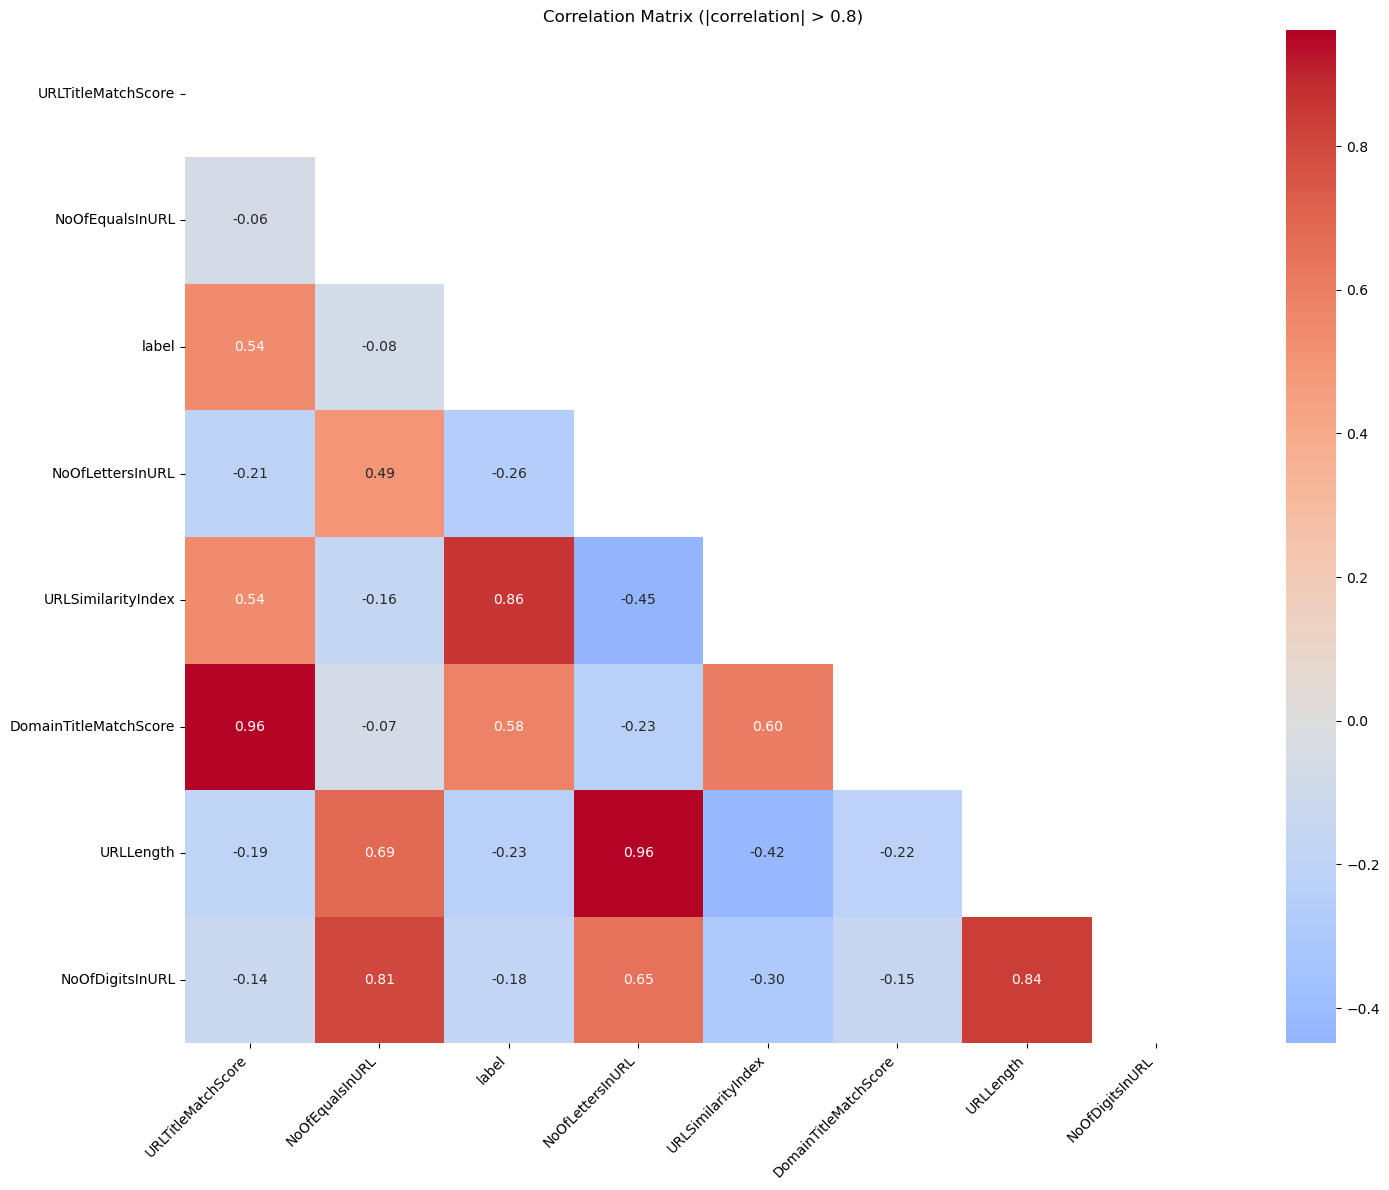


Strong correlations (>0.8):
DomainTitleMatchScore  URLTitleMatchScore       0.961008
URLTitleMatchScore     DomainTitleMatchScore    0.961008
URLLength              NoOfLettersInURL         0.956047
NoOfLettersInURL       URLLength                0.956047
URLSimilarityIndex     label                    0.860358
label                  URLSimilarityIndex       0.860358
URLLength              NoOfDigitsInURL          0.835809
NoOfDigitsInURL        URLLength                0.835809
                       NoOfEqualsInURL          0.806024
NoOfEqualsInURL        NoOfDigitsInURL          0.806024
dtype: float64


In [16]:
def plot_correlations(df, threshold=0.8):
    """
    Generate and plot correlation matrix heatmap for numerical features.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing numerical features
    threshold : float, default=0.8
        Minimum correlation coefficient to display
        
    Returns:
    --------
    None
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()
    
    # Filter strong correlations
    strong_corr = corr_matrix.where(
        (abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    ).stack().sort_values(ascending=False)
    
    if len(strong_corr) > 0:
        # Get unique columns with strong correlations
        cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
        filtered_corr = corr_matrix.loc[cols, cols]
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
        
        # Plot heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(filtered_corr,
                   mask=mask,
                   annot=True,
                   fmt='.2f',
                   cmap='coolwarm',
                   center=0)
        plt.title(f'Correlation Matrix (|correlation| > {threshold})')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print strong correlations
        print(f"\nStrong correlations (>{threshold}):")
        print(strong_corr)
    else:
        print(f"No correlations above {threshold} found")

# Get numeric columns and plot correlations
numeric_df = df.select_dtypes(include=['number'])
plot_correlations(numeric_df)

Now, after selecting numeric columns and separating them into binary and continuous features, we can perform further correlation analysis and test for strong correlations (>0.7) within our new group of variables

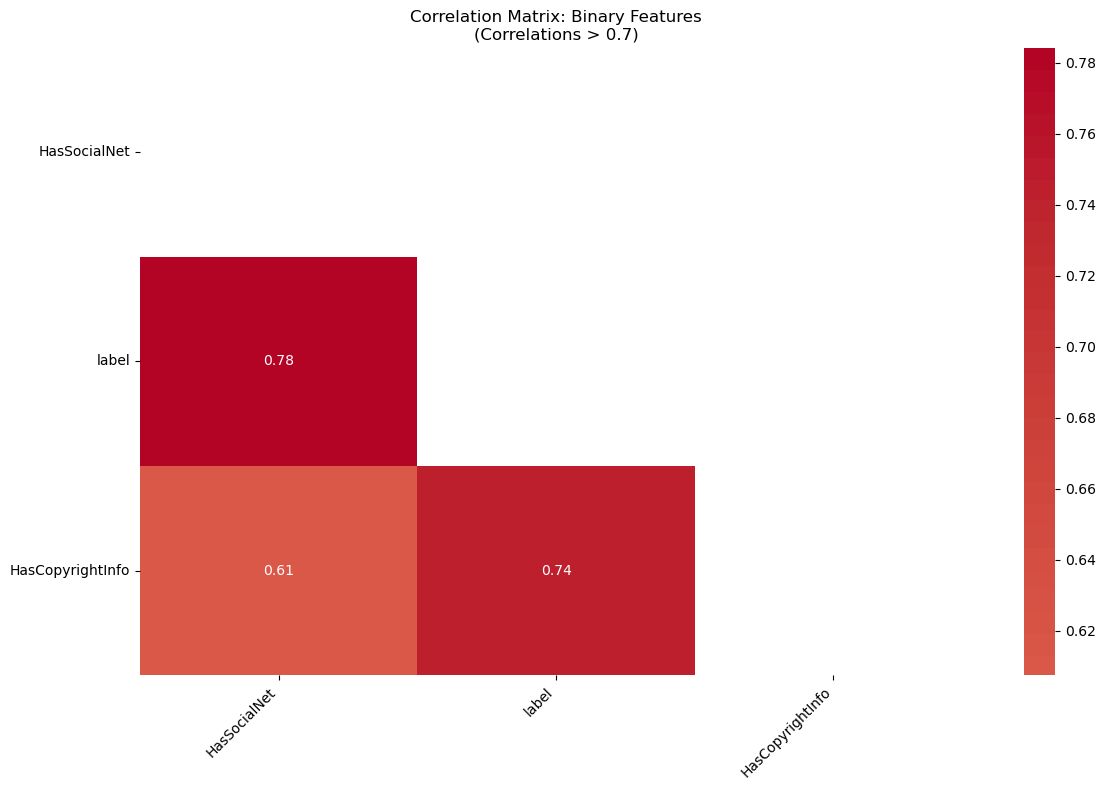


Strong correlations (0.7+) in Binary Features:
HasSocialNet      label               0.784255
label             HasSocialNet        0.784255
HasCopyrightInfo  label               0.743358
label             HasCopyrightInfo    0.743358
dtype: float64


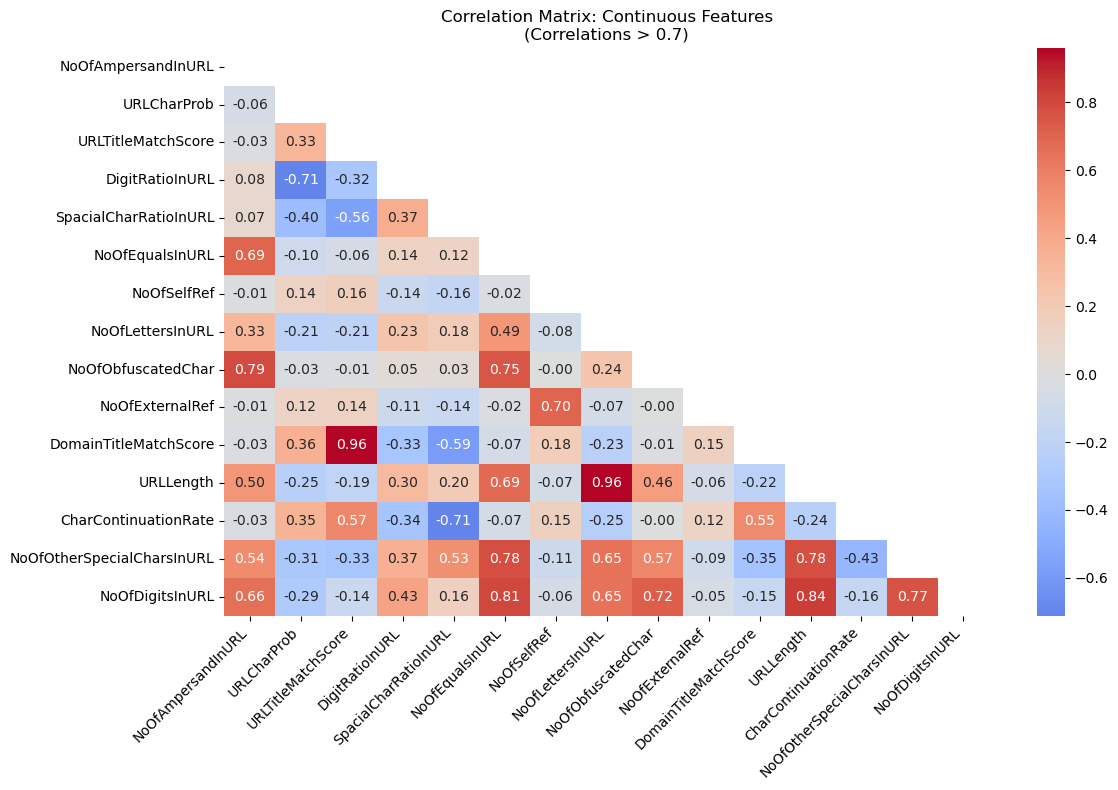


Strong correlations (0.7+) in Continuous Features:
URLTitleMatchScore          DomainTitleMatchScore         0.961008
DomainTitleMatchScore       URLTitleMatchScore            0.961008
URLLength                   NoOfLettersInURL              0.956047
NoOfLettersInURL            URLLength                     0.956047
URLLength                   NoOfDigitsInURL               0.835809
NoOfDigitsInURL             URLLength                     0.835809
                            NoOfEqualsInURL               0.806024
NoOfEqualsInURL             NoOfDigitsInURL               0.806024
NoOfAmpersandInURL          NoOfObfuscatedChar            0.786451
NoOfObfuscatedChar          NoOfAmpersandInURL            0.786451
NoOfEqualsInURL             NoOfOtherSpecialCharsInURL    0.784654
NoOfOtherSpecialCharsInURL  NoOfEqualsInURL               0.784654
URLLength                   NoOfOtherSpecialCharsInURL    0.782582
NoOfOtherSpecialCharsInURL  URLLength                     0.782582
NoOfDigits

In [17]:
def analyze_correlations(df):
	"""
	Analyze and visualize correlations in binary and continuous features of a dataset.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		The input dataframe containing the features to analyze
	
	Returns:
	--------
	None. Displays correlation heatmaps and prints strong correlations.
	"""
	# Separate binary and continuous features
	binary_features = df.columns[df.nunique() == 2].tolist()
	continuous_features = [col for col in df.select_dtypes(include=['number']).columns 
						 if col not in binary_features]
	
	def plot_correlation_group(data, title, threshold=0.7):
		"""
		Plot correlation heatmap for a group of features.
		
		Parameters:
		-----------
		data : pandas.DataFrame
			Features to analyze correlations
		title : str
			Title for the correlation plot
		threshold : float
			Correlation threshold for filtering strong correlations
		"""
		corr = data.corr()
		strong_corr = corr.where((abs(corr) > threshold) & (corr != 1.0)).stack().sort_values(ascending=False)
		
		if len(strong_corr) > 0:
			# Get unique columns with strong correlations
			cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
			filtered_corr = corr.loc[cols, cols]
			
			# Create mask for upper triangle
			mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
			
			# Plot heatmap
			plt.figure(figsize=(12, 8))
			sns.heatmap(filtered_corr, 
					   mask=mask,
					   annot=True, 
					   fmt='.2f',
					   cmap='coolwarm', 
					   center=0)
			plt.title(f'Correlation Matrix: {title}\n(Correlations > {threshold})')
			plt.xticks(rotation=45, ha='right')
			plt.yticks(rotation=0)
			plt.tight_layout()
			plt.show()
			
			# Print strong correlations
			print(f"\nStrong correlations ({threshold}+) in {title}:")
			print(strong_corr)
		else:
			print(f"\nNo correlations above {threshold} found in {title}")
	
	# Analyze both feature groups
	plot_correlation_group(df[binary_features], "Binary Features")
	plot_correlation_group(df[continuous_features], "Continuous Features")

# Usage
analyze_correlations(df)

### <font color='#FFB703'>EDA</font>

To understand the general difference between the length of a <font color='#FFB703'>legitemate link</font> and the length of an <font color='#FFB703'>phishing link</font>, we have to study the relationship between <font color='#FFB703'>URL length</font> against our known data, <font color='#FFB703'>'label'</font>. Though insufficient to draw conclusions, it gives us a initial idea of how the spread looks like.

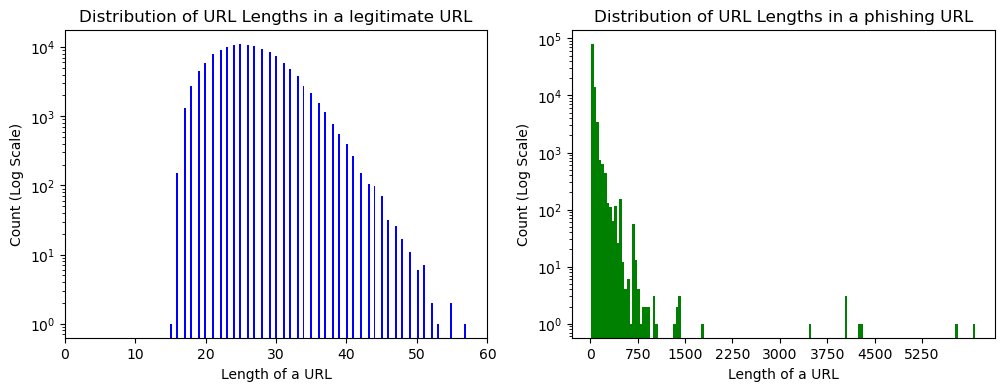

In [18]:
#Data
data1 = df[df['label'] == 1]['URLLength']  #Legitimate URL data
data2 = df[df['label'] == 0]['URLLength']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of URL Lengths in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Length of a URL")
axes[0].set_xticks(ticks=range(0, 70, 10))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of URL Lengths in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Length of a URL")
axes[1].set_xticks(ticks=range(0,5500,750))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Similarly, before drawing conclusions, we have to analyse the relationship between that of other variables such as the <font color='#FFB703'>number of letters in the URL</font> and <font color='#FFB703'>number of letters against the length of a URL</font>, with whether the <font color='#FFB703'>link is phishing</font>~

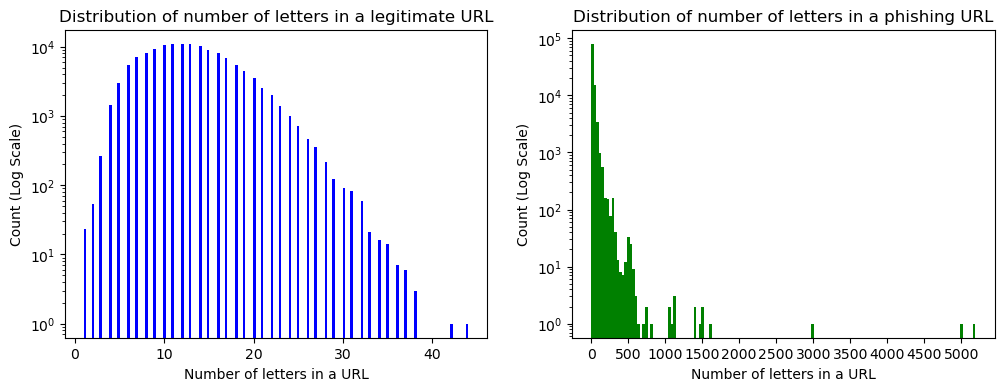

In [19]:
#Data
data1 = df[df['label'] == 1]['NoOfLettersInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfLettersInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of letters in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of letters in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of letters in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of letters in a URL")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks(ticks=range(0, 5500, 500)) #Specify grid

plt.show()

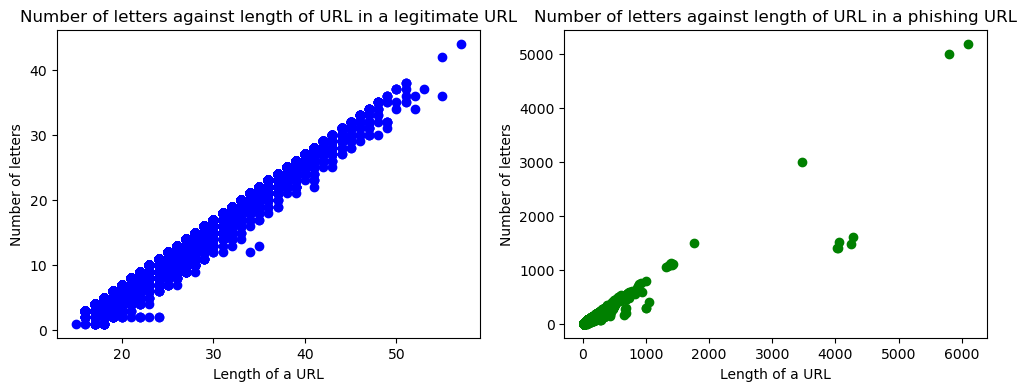

In [20]:
#Data
data1 = df[df['label'] == 1]  #Legitimate URL data
data2 = df[df['label'] == 0]  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].scatter(data1['URLLength'], data1['NoOfLettersInURL'], color='blue')
axes[0].set_title("Number of letters against length of URL in a legitimate URL") #Title
axes[0].set_xlabel("Length of a URL")
axes[0].set_ylabel("Number of letters")

# Plot the second histogram
axes[1].scatter(data2['URLLength'], data2['NoOfLettersInURL'],  color='green')
axes[1].set_title("Number of letters against length of URL in a phishing URL")
axes[1].set_xlabel("Length of a URL")
axes[1].set_ylabel("Number of letters")

plt.show()

As a comparision, though we cannot simply discuss the relationship between the number of numbers with whther the link is phishing, we an measure the relationship between <font color='#FFB703'>ratio of digits</font> in the URL and whether it is a phishing link. However, it did not seem to have as strong of a correlation as compared to the distribution of numbers or number of letters.

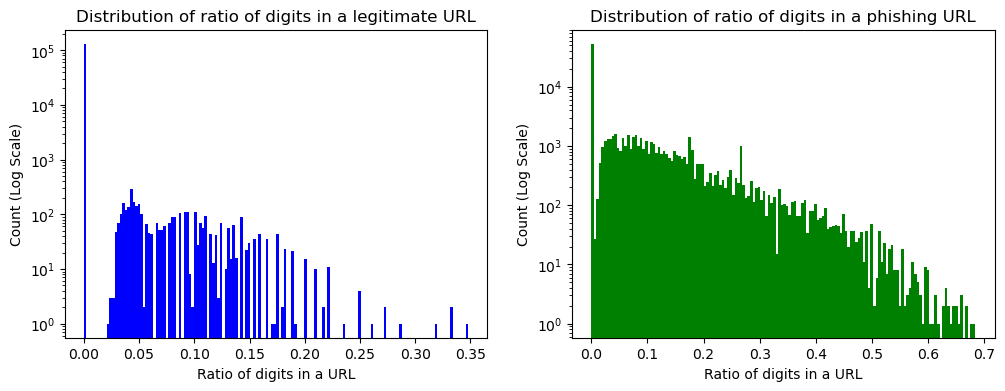

In [21]:
#Data
data1 = df[df['label'] == 1]['DigitRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['DigitRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of digits in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of digits in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of digits in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of digits in a URL")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

The next part of the observations revolves around the use of operators that are part of the standard format of URL Query strings, as the hypothesis is that these operators would let us better observe the use patterns of queries as part of phishing links.

<font color='#FFB703'>'=' Equals sign operator</font> provides <font color='#FFB703'>key=value pairs</font> to the webscript

<font color='#FFB703'>'?' Question mark operator</font> indicates the <font color='#FFB703'>start of the query string</font>

and <font color='#FFB703'>'&' Ampersand operator</font> <font color='#FFB703'>separates</font> each key/value pair.

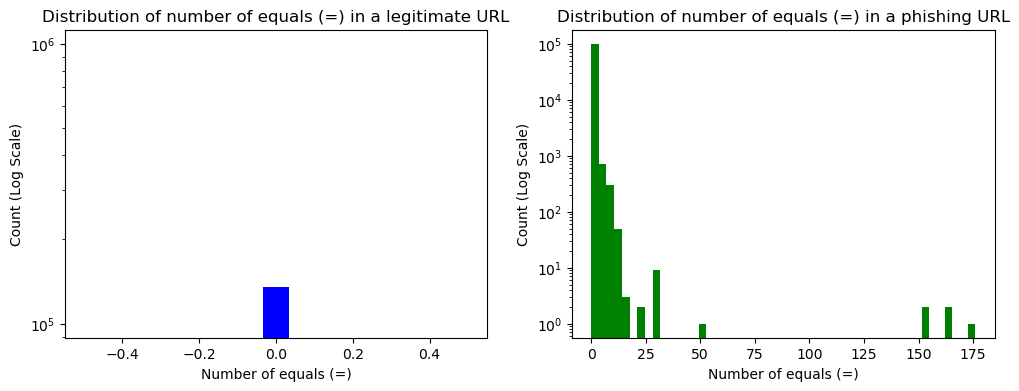

In [22]:
#Data
data1 = df[df['label'] == 1]['NoOfEqualsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfEqualsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of equals (=) in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of equals (=)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of equals (=) in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of equals (=)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

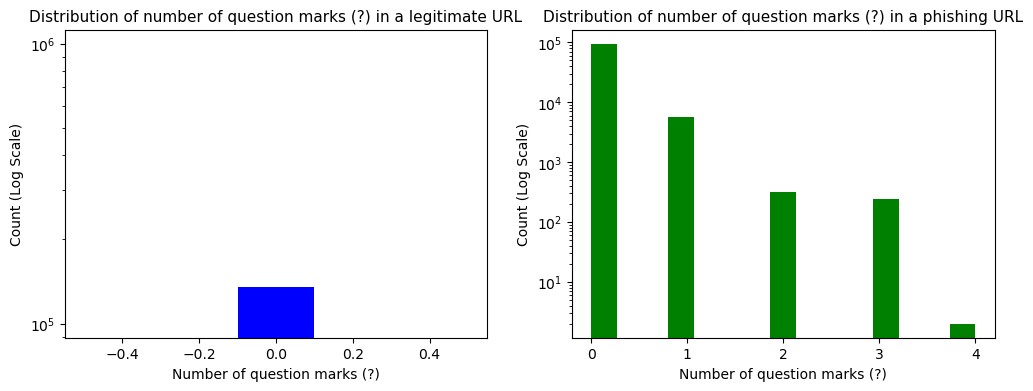

In [23]:
#Data
data1 = df[df['label'] == 1]['NoOfQMarkInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfQMarkInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of question marks (?) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of question marks (?)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=15, color='green')
axes[1].set_title("Distribution of number of question marks (?) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of question marks (?)")
axes[1].set_xticks(ticks=range(0,5,1))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

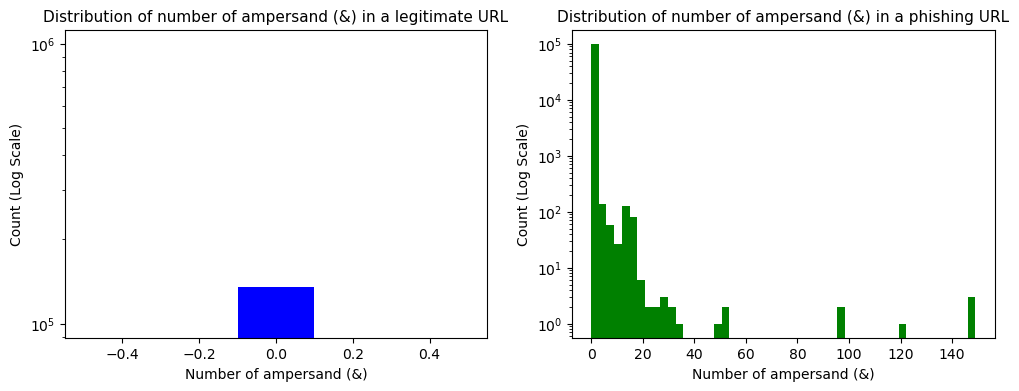

In [24]:
#Data
data1 = df[df['label'] == 1]['NoOfAmpersandInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfAmpersandInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of ampersand (&) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of ampersand (&)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of ampersand (&) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of ampersand (&)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

From above, we observed a similar distribution of <font color='#FFB703'>'=', '?' and '&'</font> operators their respective links, which gives us a pretty decent early estimation of the reliability of these variables in determining whether a link is phishing or not.

Next, in order to avoid bias, we test decided to also test the relationship of <font color='#FFB703'>special characters</font>, including the data we tested above, with whether a link is phishing.

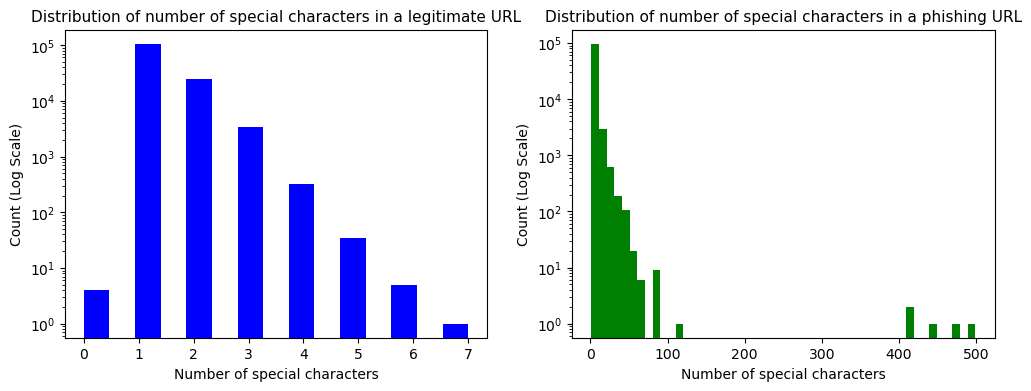

In [25]:
#Data
data1 = df[df['label'] == 1]['NoOfOtherSpecialCharsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfOtherSpecialCharsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of special characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of special characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of special characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of special characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

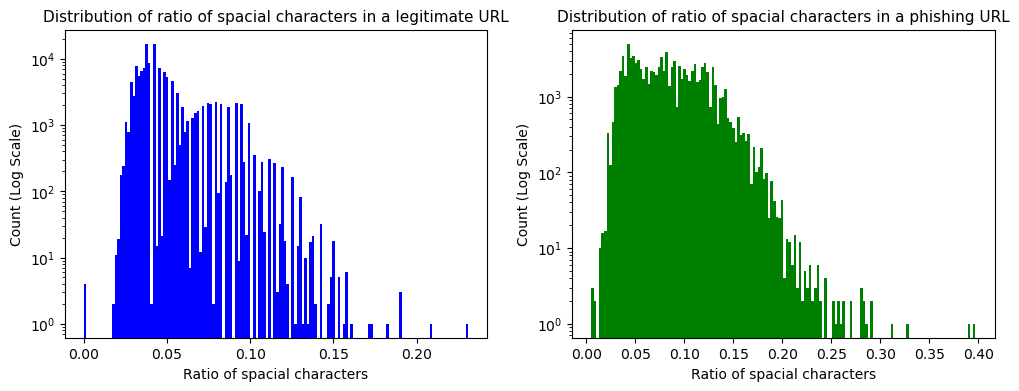

In [26]:
#Data
data1 = df[df['label'] == 1]['SpacialCharRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['SpacialCharRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of spacial characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of spacial characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of spacial characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of spacial characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Generally speaking, legitimate URL would be incentivised to secure their website as much as possible as it leads to the least amount of unfavourable events from happening to their clients and themselves. The data proves us correct, as almost all legitimate URLs <font color='#FFB703'>use HTTPS</font> while the spread for using HTTPS in phishing links remain almost even.

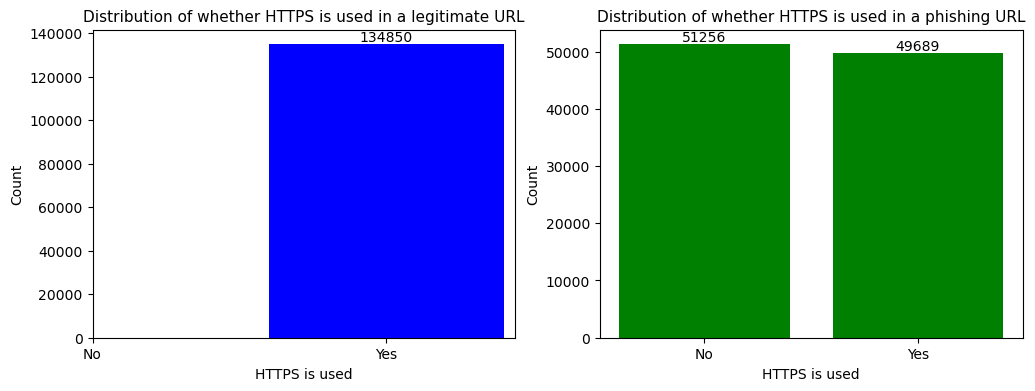

In [27]:
# Data
data1 = df[df['label'] == 1]['IsHTTPS'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['IsHTTPS'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether HTTPS is used in a legitimate URL", fontsize=11)  # Title
axes[0].set_xlabel("HTTPS is used")
axes[0].set_ylabel("Count") 
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot  
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether HTTPS is used in a phishing URL", fontsize=11)
axes[1].set_xlabel("HTTPS is used")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

Similarly, the <font color='#FFB703'>use of copyright information</font> differed greatly between a legitimate website and phishing website.

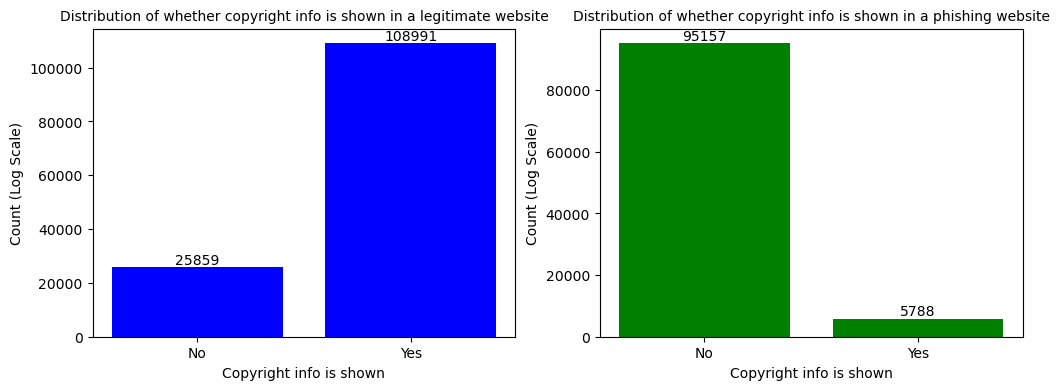

In [28]:
# Data
data1 = df[df['label'] == 1]['HasCopyrightInfo'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['HasCopyrightInfo'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether copyright info is shown in a legitimate website", fontsize=10)  # Title
axes[0].set_xlabel("Copyright info is shown")
axes[0].set_ylabel("Count (Log Scale)")
axes[0].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether copyright info is shown in a phishing website", fontsize=10)
axes[1].set_xlabel("Copyright info is shown")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

We see some similarity in the <font color='#FFB703'>distribution of number of images</font> in legitimate and phishing urls, although the scale of images differs greatly between the two, with the distribution of images in legitimate URLs in the thousands whereas the distribution of images in a phishing URL is only in the tens.

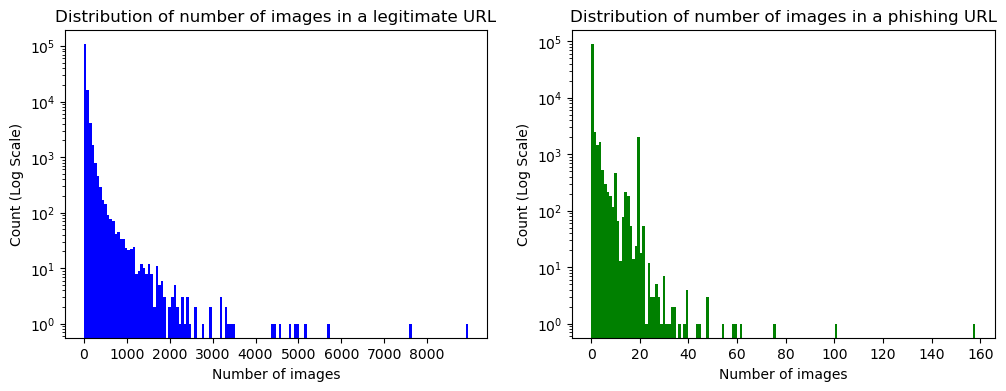

In [29]:
#Data
data1 = df[df['label'] == 1]['NoOfImage']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfImage']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of images in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of images")
axes[0].set_xticks(ticks=range(0,9000,1000))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of images in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of images")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

### <font color='#FFB703'>Feature Engineering</font>
Currently, our dataset contains the majority of the data we need. However, checking for potential transformations may yield better results.

The <font color='#FFB703'>data review process</font> looks something like this:

1. Check existing features
2. Identify potential transformations
3. Plan new feature creation

#### <font color='#FFB703'>Identify Potential Transformations</font>


Feature correlations with target (label):
label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit

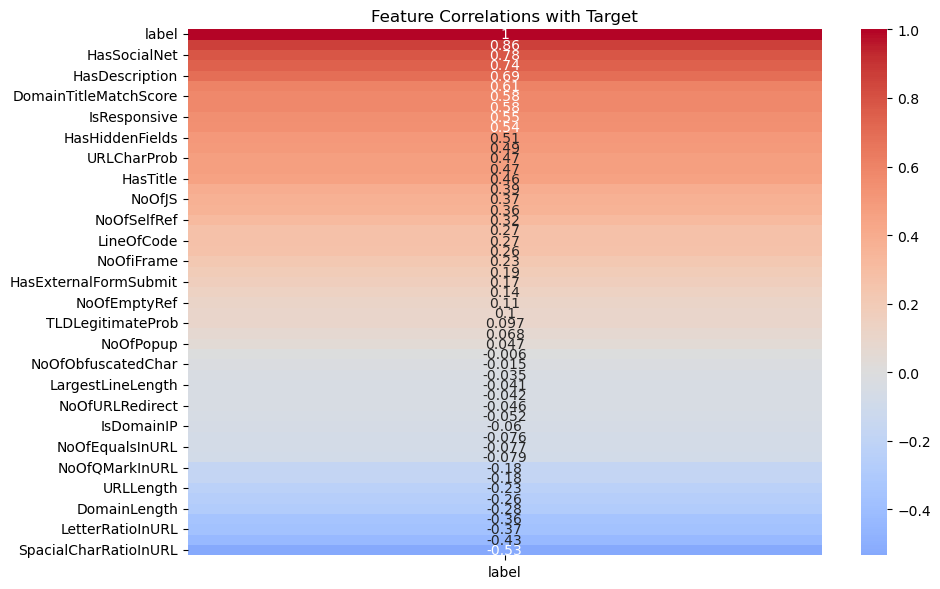

In [30]:
def corr_label(df, threshold=0.5):
    """
    Analyze and visualize correlations between features and the target variable.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing numerical features and target variable
    threshold : float, default=0.5
        Minimum correlation coefficient threshold for filtering
        
    Returns:
    --------
    None
        Displays correlation analysis results and heatmap visualization
    """
    # Calculate correlations with target variable
    target_correlations = df.corr()['label'].sort_values(ascending=False)
    
    # Print correlations
    print("\nFeature correlations with target (label):")
    print(target_correlations)

    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(target_correlations.to_frame(), 
                annot=True, 
                cmap='coolwarm',
                center=0)
    plt.title('Feature Correlations with Target')
    plt.tight_layout()
    plt.show()

# Use only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
corr_label(numeric_df)

#### <font color='#FFB703'>Identify Potnetial Feature Groups</font>

In [31]:
def analyze_feature_groups(df):
	"""
	Analyze and categorize features into semantic groups for URL phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing URL features
		
	Returns:
	--------
	dict
		Dictionary of feature groups with their respective features
	
	Groups:
	-------
	- URL Features: Basic URL characteristics
	- Security Features: Security-related indicators
	- Content Features: Content and text-based features
	- Domain Features: Domain-specific attributes
	- Navigation Features: Navigation and reference patterns
	"""
	
	# Define feature groups with their respective patterns
	group_patterns = {
		'URL Features': ['url'],
		'Security Features': ['https', 'ssl', 'security', 'crypto', 'password'],
		'Content Features': ['text', 'word', 'char', 'title', 'description', 'image', 'js', 'css'],
		'Domain Features': ['domain', 'tld'],
		'Navigation Features': ['redirect', 'ref', 'link', 'external']
	}
	
	# Initialize feature groups dictionary
	feature_groups = {group: [] for group in group_patterns.keys()}
	
	# Categorize features
	for col in df.columns:
		col_lower = col.lower()
		for group, patterns in group_patterns.items():
			if any(pattern in col_lower for pattern in patterns):
				feature_groups[group].append(col)
				break
	
	# Remove empty groups
	feature_groups = {k: v for k, v in feature_groups.items() if v}
	
	# Display results
	print("Feature Groups Analysis:")
	print("-" * 50)
	for group, features in feature_groups.items():
		print(f"\n{group} ({len(features)}):")
		for feature in features:
			print(f"- {feature}")
	
	# Show summary
	total_features = sum(len(features) for features in feature_groups.values())
	print(f"\nTotal Features Categorized: {total_features}")
	
	return feature_groups

# Analyze feature groups
feature_groups = analyze_feature_groups(df)

Feature Groups Analysis:
--------------------------------------------------

URL Features (15):
- URL
- URLLength
- URLSimilarityIndex
- URLCharProb
- NoOfLettersInURL
- LetterRatioInURL
- NoOfDigitsInURL
- DigitRatioInURL
- NoOfEqualsInURL
- NoOfQMarkInURL
- NoOfAmpersandInURL
- NoOfOtherSpecialCharsInURL
- SpacialCharRatioInURL
- URLTitleMatchScore
- NoOfURLRedirect

Security Features (3):
- IsHTTPS
- HasPasswordField
- Crypto

Content Features (9):
- CharContinuationRate
- NoOfObfuscatedChar
- HasTitle
- Title
- DomainTitleMatchScore
- HasDescription
- NoOfImage
- NoOfCSS
- NoOfJS

Domain Features (7):
- Domain
- DomainLength
- IsDomainIP
- TLD
- TLDLegitimateProb
- TLDLength
- NoOfSubDomain

Navigation Features (5):
- NoOfSelfRedirect
- HasExternalFormSubmit
- NoOfSelfRef
- NoOfEmptyRef
- NoOfExternalRef

Total Features Categorized: 39


#### <font color='#FFB703'>URL Component Analysis</font>

We'll break down URLs into their core components to better understand patterns that distinguish legitimate from phishing URLs.

These features break down URLs into core components to identify phishing patterns:
- Component length analysis
- Path complexity metrics
- Query parameter patterns

##### <font color='#FFB703'>URL Length Analysis</font>
Analyzing various length-based metrics helps identify unusual URL structures often associated with phishing.

<font color='#FFB703'>1. Data Preparation</font>
- Load existing DataFrame
- Verify URL column
- Check for missing values

<font color='#FFB703'>2. Component Extraction</font>
- Parse URL structure
- Extract scheme/path/query
- Calculate lengths

<font color='#FFB703'>3. Feature Creation Steps</font>
- Basic components
- Length metrics
- Ratio calculations
- Validation checks

In [32]:
def create_url_features(df):
    """
    Creates new features based on URL component analysis
    Parameters:
        df: DataFrame containing 'URL' column
    Returns:
        df: DataFrame with new URL component features
    """
    # Parse URLs
    parsed_urls = df['URL'].apply(lambda x: urlparse(x))
    
    # Extract components
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    df['url_scheme'] = parsed_urls.apply(lambda x: x.scheme)
    df['url_path'] = parsed_urls.apply(lambda x: x.path)
    df['url_query'] = parsed_urls.apply(lambda x: x.query)
    
    # Calculate lengths - using efficient vectorized operations
    df['path_length'] = df['url_path'].str.len()
    df['query_length'] = df['url_query'].str.len()
    
    # Calculate ratios - safely handling division by zero
    df['path_url_ratio'] = df['path_length'] / df['URLLength'].replace(0, 1)
    df['query_url_ratio'] = df['query_length'] / df['URLLength'].replace(0, 1)
    
    return df

# Implementation
df = create_url_features(df)

# Display results
display(df[['url_scheme', 'path_length', 'query_length', 
           'path_url_ratio', 'query_url_ratio']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['path_length', 'query_length', 
          'path_url_ratio', 'query_url_ratio']].isnull().sum())

,url_scheme,path_length,query_length,path_url_ratio,query_url_ratio
0,https,0,0,0.0,0.0
1,https,0,0,0.0,0.0
2,https,0,0,0.0,0.0
3,https,0,0,0.0,0.0
4,https,0,0,0.0,0.0



Missing values check:
path_length        0
query_length       0
path_url_ratio     0
query_url_ratio    0
dtype: int64


In [33]:
df[['path_length', 'query_length', 'path_url_ratio', 'query_url_ratio']].describe()

,path_length,query_length,path_url_ratio,query_url_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,3.735325,2.212977,0.050732,0.011190
std,23.501818,24.880892,0.148927,0.080924
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.013514,0.000000
max,4248.000000,3391.000000,1.138462,0.976389


##### <font color='#FFB703'>URL Path Analysis Features</font>
Creating features to analyze URL path structure:
- Path depth (number of segments)
- Path complexity metrics
- Directory structure patterns

<font color='#FFB703'>1. Data Preparation</font>
  - Extract path components
  - Remove empty paths
  - Clean special characters
  
<font color='#FFB703'>2. Feature Creation Plan</font>
  - Path Depth Features
    - Number of directories
    - Directory length stats
    - Path complexity score
  - Path Pattern Features
    - Common directory names
    - File extension analysis
    - Suspicious patterns

In [34]:
def create_path_features(df):
    """
    Create features based on URL path structure analysis for phishing detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL-related columns including 'url_path'
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new path-based features added
    
    Features Created:
    ----------------
    - dir_count: Number of directories in path
    - dir_depth: Depth of directory structure
    - max_dir_length: Length of longest directory name
    - avg_dir_length: Average directory name length
    - path_complexity: Composite score of path complexity
    """
    
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    
    # Path structure analysis
    paths = df['url_path'].str.strip('/')
    
    # Directory features
    df['dir_count'] = paths.str.count('/')
    df['dir_depth'] = df['dir_count'] + 1
    
    # Directory length analysis
    def get_dir_lengths(path):
        """Calculate directory length statistics."""
        if not path:
            return [0]
        return [len(p) for p in path.split('/')]
    
    # Vectorized operations for efficiency
    dir_lengths = paths.apply(get_dir_lengths)
    df['max_dir_length'] = dir_lengths.apply(max)
    df['avg_dir_length'] = dir_lengths.apply(np.mean)
    
    # Composite complexity score
    df['path_complexity'] = df['dir_depth'] * df['avg_dir_length']
    
    return df

# Implementation
df = create_path_features(df)
display(df[['dir_count', 'dir_depth', 'max_dir_length', 
               'avg_dir_length', 'path_complexity']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['dir_count', 'dir_depth', 'max_dir_length', 
          'avg_dir_length', 'path_complexity']].isnull().sum())

,dir_count,dir_depth,max_dir_length,avg_dir_length,path_complexity
0,0,1,0,0.0,0.0
1,0,1,0,0.0,0.0
2,0,1,0,0.0,0.0
3,0,1,0,0.0,0.0
4,0,1,0,0.0,0.0



Missing values check:
dir_count          0
dir_depth          0
max_dir_length     0
avg_dir_length     0
path_complexity    0
dtype: int64


In [35]:
df[['dir_count', 'dir_depth', 'max_dir_length', 
    'avg_dir_length', 'path_complexity']].describe()

,dir_count,dir_depth,max_dir_length,avg_dir_length,path_complexity
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.136614,1.136614,2.378036,1.489341,3.315579
std,0.655255,0.655255,10.456525,5.519711,22.987350
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,32.000000,33.000000,876.000000,249.500000,4220.000000


##### <font color='#FFB703'>Path Analysis Features</font>
These features analyze URL path structure to detect suspicious patterns common in phishing URLs

<font color='#FFB703'>1. Extract Path Components</font>
  - Split URL path
  - Count directories
  - Analyze segments
  - Calculate Base Metrics

<font color='#FFB703'>2. Directory count</font>
  - Path depth
  - Segment lengths
  - Create Advanced Features

<font color='#FFB703'>3. Complexity scores</font>
  - Pattern detection
  - Ratio calculations

In [36]:
def create_advanced_path_features(df):
    """
    Creates advanced path-based features for phishing URL detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL data with 'url_path' and 'URLLength' columns
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new path-based features added
        
    Features:
    ---------
    - directory_count: Number of directories in path
    - path_depth: Depth of directory structure (directories + 1)
    - max_segment_length: Length of longest path segment
    - avg_segment_length: Average length of path segments
    - path_complexity_score: Composite score based on path structure 
    - path_entropy: Measure of character diversity in path
    """
    df = df.copy()
    
    # Basic path metrics
    df['directory_count'] = df['url_path'].str.count('/')
    df['path_depth'] = df['directory_count'] + 1
     
    # Helper function for segment analysis
    def analyze_segments(path):
        segments = [s for s in path.split('/') if s]
        if not segments:
            return 0, 0
        lengths = [len(s) for s in segments]
        return max(lengths), sum(lengths) / len(lengths)
    
    # Vectorized segment analysis 
    segment_stats = df['url_path'].apply(analyze_segments)
    df['max_segment_length'], df['avg_segment_length'] = zip(*segment_stats)
    
    # Advanced metrics
    df['path_complexity_score'] = (
        df['path_depth'] * 
        df['avg_segment_length'] * 
        df['max_segment_length'].div(df['URLLength'])
    )
    
    # Calculate path entropy (character diversity)
    df['path_entropy'] = df['url_path'].apply(
        lambda x: len(set(x)) / len(x) if x else 0
    )
    
    return df

# Implementation
df = create_advanced_path_features(df)
df[['directory_count', 'path_depth', 'max_segment_length', 
    'avg_segment_length', 'path_complexity_score', 'path_entropy']].head()

,directory_count,path_depth,max_segment_length,avg_segment_length,path_complexity_score,path_entropy
0,0,1,0,0.0,0.0,0.0
1,0,1,0,0.0,0.0,0.0
2,0,1,0,0.0,0.0,0.0
3,0,1,0,0.0,0.0,0.0
4,0,1,0,0.0,0.0,0.0


In [37]:
# Verify no missing values
print("\nMissing values check:")
print(df[['directory_count', 'path_depth', 'max_segment_length', 
          'avg_segment_length', 'path_complexity_score', 'path_entropy']].isnull().sum())

df[['directory_count', 'path_depth', 'max_segment_length', 
    'avg_segment_length', 'path_complexity_score', 'path_entropy']].describe()


Missing values check:
directory_count          0
path_depth               0
max_segment_length       0
avg_segment_length       0
path_complexity_score    0
path_entropy             0
dtype: int64


,directory_count,path_depth,max_segment_length,avg_segment_length,path_complexity_score,path_entropy
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.419746,1.419746,2.378036,1.495380,1.952753,0.216236
std,0.970301,0.970301,10.456525,5.541755,11.020335,0.384301
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.360825
max,33.000000,34.000000,876.000000,249.500000,1050.161638,1.000000


#### <font color='#FFB703'>Correlation Analysis of URL-Related Features with Target Variable</font>
Analyzing feature effectiveness for phishing detection

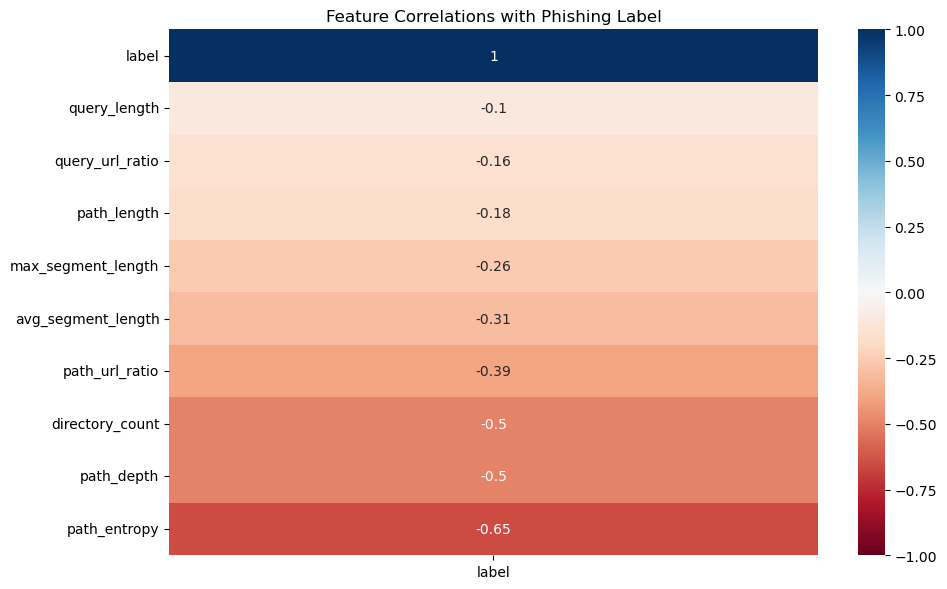


Feature Correlations with Phishing Label:
label                 1.000000
query_length         -0.102800
query_url_ratio      -0.159826
path_length          -0.183701
max_segment_length   -0.262854
avg_segment_length   -0.311881
path_url_ratio       -0.393725
directory_count      -0.499993
path_depth           -0.499993
path_entropy         -0.650340
Name: label, dtype: float64


In [38]:
def analyze_feature_correlations(df):
    """
    Analyze correlations between URL features and phishing label
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL features and phishing labels
        
    Returns:
    --------
    pandas.Series
        Correlations between features and phishing label, sorted by strength
    """
    # Select most relevant URL features for analysis
    url_features = [
        'path_entropy',           # Entropy of URL path
        'directory_count',        # Number of directories in path
        'path_depth',            # Depth of path structure 
        'path_url_ratio',        # Path length relative to URL length
        'max_segment_length',     # Longest path segment
        'avg_segment_length',     # Average path segment length
        'path_length',           # Total path length
        'query_length',          # Query string length
        'query_url_ratio'        # Query length relative to URL
    ]
    
    # Calculate and sort correlations 
    correlations = (df[url_features + ['label']]
                   .corr()['label']
                   .sort_values(ascending=False))
    
    # Visualize correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df[url_features + ['label']]
        .corr()[['label']]
        .sort_values(by='label', ascending=False),
        annot=True,
        cmap='RdBu',
        vmin=-1, 
        vmax=1
    )
    plt.title('Feature Correlations with Phishing Label')
    plt.tight_layout()
    plt.show()
    
    return correlations

# Get correlation results
feature_correlations = analyze_feature_correlations(df)
print("\nFeature Correlations with Phishing Label:")
print(feature_correlations)

From the above heatmap, we can conclude that certain features are of less importance. Take a look at the grouped distribution below:

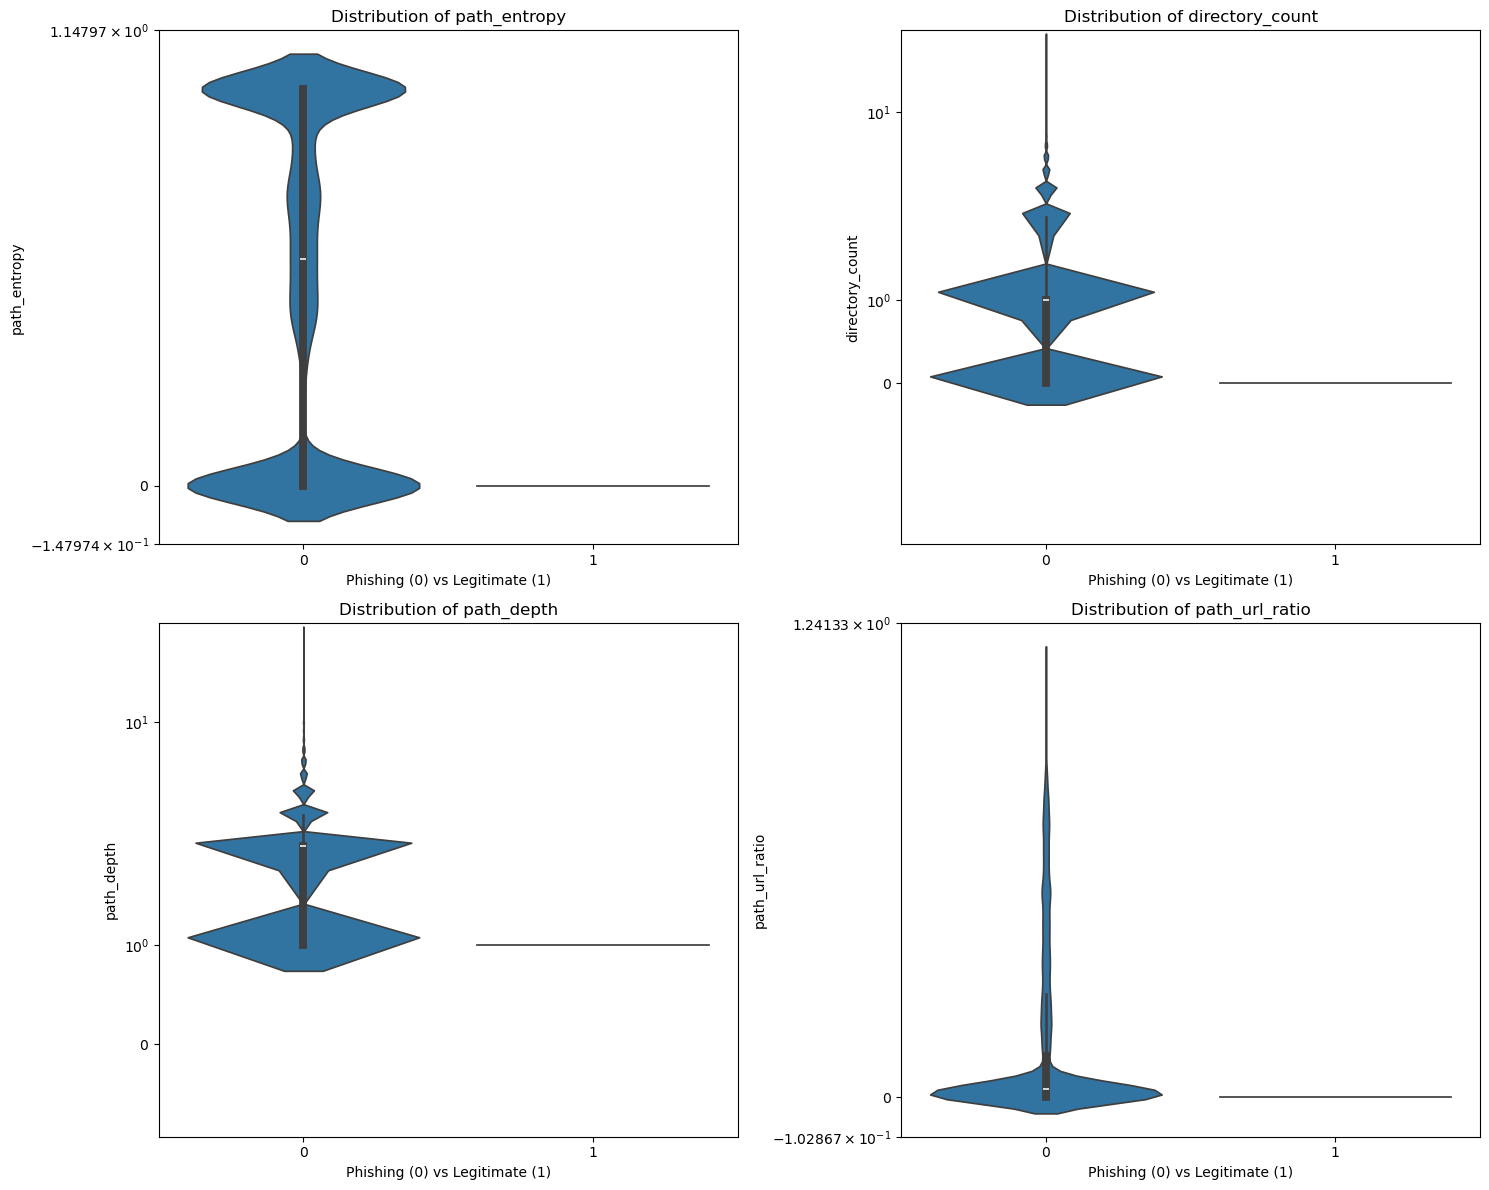

In [39]:
def visualize_feature_importance(df):
	"""
	Create individual plots for each feature with log scale
	"""
	# Select important features identified from correlation analysis
	important_features = [
		'path_entropy',
		'directory_count', 
		'path_depth',
		'path_url_ratio'
	]
	
	# Create a figure with subplots
	fig, axes = plt.subplots(2, 2, figsize=(15, 12))
	axes = axes.ravel()
	
	# Create box plots with log scale
	for idx, feature in enumerate(important_features):
		# Create violin plot
		sns.violinplot(
			data=df,
			x='label',
			y=feature,
			ax=axes[idx]
		)
		
		# Set log scale for y-axis
		axes[idx].set_yscale('symlog')  # Use symlog to handle zero/negative values
		
		# Customize labels and title
		axes[idx].set_title(f'Distribution of {feature}')
		axes[idx].set_xlabel('Phishing (0) vs Legitimate (1)')
		# axes[idx].set_ylabel(f'{feature} (log scale)')
		
		# Rotate x-axis labels for better readability
		axes[idx].tick_params(axis='x', rotation=0)

	plt.tight_layout()
	plt.show()

# Call the function
visualize_feature_importance(df)

From the graphs above, we can tell that `directory_count`, `path_depth` and `path_url_ratio` are less suitable to be used due to the presence of extreme outliers and extremely skewed distribution of data. `path_entropy` on the other hand, although having most values around both extremes, present itself as a much more ideal candidate to be used later on.

Domain Analysis Features
Creating features to analyze domain structure and patterns:
- Domain length metrics
- Subdomain analysis
- TLD patterns
- Special character distribution in domain

#### <font color='#FFB703'>Domain Analysis Features</font>

Creating features to analyse domain structure and patterns:
- Domain length metrics
- Subdomain analysis
- TLD patterns
- Special character distribution in domain

##### <font color='#FFB703'>Basic Domain Structure Analysis</font>
These features analyse fundamental domain characteristics that should differ between legitimate and phishing URLs

In [40]:
def create_basic_domain_features(df):
    """
    Create basic domain-based features for phishing detection analysis.
    
    Features created:
    - domain_length: Total length of the domain
    - domain_digit_count: Number of digits in domain
    - domain_digit_ratio: Ratio of digits to total domain length
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing 'Domain' column
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new domain-based features added
    """
    # Create copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Create domain length feature (avoid redundant calculation)
    df['domain_length'] = df['Domain'].str.len()
    
    # Count digits in domain
    df['domain_digit_count'] = df['Domain'].apply(lambda x: sum(c.isdigit() for c in x))
    
    # Calculate digit ratio (safely handle division by zero)
    df['domain_digit_ratio'] = df['domain_digit_count'] / df['domain_length'].replace(0, 1)
    
    return df

# Implementation
df = create_basic_domain_features(df)
df[['domain_length', 'domain_digit_count', 'domain_digit_ratio']].head()

,domain_length,domain_digit_count,domain_digit_ratio
0,24,0,0.0
1,16,0,0.0
2,22,0,0.0
3,19,0,0.0
4,26,0,0.0


In [41]:
df[['domain_length', 'domain_digit_count', 'domain_digit_ratio']].describe()

,domain_length,domain_digit_count,domain_digit_ratio
count,235795.000000,235795.000000,235795.000000
mean,21.470396,0.882461,0.031070
std,9.150793,2.791436,0.091962
min,4.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000
50%,20.000000,0.000000,0.000000
75%,24.000000,0.000000,0.000000
max,110.000000,67.000000,0.885714


##### <font color='#FFB703'>Subdomain Pattern Analysis</font>
Phishing URLs often use complex subdomain structures to mimic legitimate domains

In [42]:
def analyse_subdomains(df):
    """
    Analyze subdomain patterns for phishing detection.
    
    Creates features:
    - subdomain_count: Number of dots in domain (subdomains + 1)
    - max_subdomain_length: Length of longest subdomain section
    - avg_subdomain_length: Average length of subdomain sections
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Domain' column
        
    Returns:
    -------
    pandas.DataFrame
        DataFrame with new subdomain features added
    """
    # Create copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Split domains into parts just once for efficiency
    domain_parts = df['Domain'].str.split('.')
    
    # Calculate features using vectorized operations
    df['subdomain_count'] = domain_parts.str.len() - 1  # Subtract 1 for TLD
    df['max_subdomain_length'] = domain_parts.apply(lambda x: max(len(part) for part in x))
    df['avg_subdomain_length'] = domain_parts.apply(lambda x: np.mean([len(part) for part in x]))
    
    return df

# Implementation
df = analyse_subdomains(df)
df[['subdomain_count', 'max_subdomain_length', 'avg_subdomain_length']].head()

,subdomain_count,max_subdomain_length,avg_subdomain_length
0,2,16,7.333333
1,2,9,4.666667
2,3,12,4.750000
3,2,11,5.666667
4,2,18,8.000000


In [43]:
df[['subdomain_count', 'max_subdomain_length', 'avg_subdomain_length']].describe()

,subdomain_count,max_subdomain_length,avg_subdomain_length
count,235795.000000,235795.000000,235795.000000
mean,2.164758,12.088823,6.136038
std,0.600969,7.222071,2.526339
min,1.000000,2.000000,1.500000
25%,2.000000,8.000000,4.333333
50%,2.000000,11.000000,5.666667
75%,2.000000,15.000000,7.333333
max,11.000000,63.000000,27.500000


##### <font color='#FFB703'>TLD Analysis</font>
Top Level Domain patterns can indicate suspicious domains

In [44]:
def analyze_tld(df):
    """
    Analyze Top Level Domain (TLD) patterns in URLs.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL data with 'Domain' column
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with added TLD analysis features:
        - tld_length: Length of the TLD
        - is_common_tld: Boolean indicating if TLD is common (.com, .org, etc.)
    """
    # Define common TLDs
    common_tlds = {'com', 'org', 'net', 'edu', 'gov'}
    
    # Extract and analyze TLD properties
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    tld = df['Domain'].str.split('.').str[-1]
    df['tld_length'] = tld.str.len()
    df['is_common_tld'] = tld.isin(common_tlds)
    
    return df

# Apply TLD analysis
df = analyze_tld(df)
df[['tld_length', 'is_common_tld']].head()

,tld_length,is_common_tld
0,3,True
1,2,False
2,2,False
3,3,True
4,3,True


In [45]:
df[['tld_length', 'is_common_tld']].describe()

,tld_length
count,235795.000000
mean,2.764456
std,0.599739
min,2.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


##### <font color='#FFB703'>Advanced Domain Analysis</font>

In [46]:
def analyze_domain_patterns(df):
	"""
	Create advanced domain analysis features for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing 'Domain', 'DomainLength', 
		'TLDLength', and 'NoOfSubDomain' columns
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new domain analysis features added
		
	Features Created:
	----------------
	- domain_letter_ratio: Proportion of letters in domain
	- domain_digit_ratio: Proportion of digits in domain
	- domain_special_ratio: Proportion of special characters in domain
	- subdomain_stats: Average and max subdomain lengths
	- domain_relationships: Ratios between domain components
	"""
	df = df.copy()
	
	# Calculate character composition ratios in vectorized operations
	domain_chars = df['Domain'].str
	total_len = domain_chars.len()
	
	df['domain_letter_ratio'] = domain_chars.count(pat='[a-zA-Z]') / total_len
	df['domain_digit_ratio'] = domain_chars.count(pat='\\d') / total_len
	df['domain_special_ratio'] = (total_len - domain_chars.count(pat='[a-zA-Z0-9]')) / total_len
	
	# Subdomain analysis using vectorized operations
	subdomains = df['Domain'].str.split('.')
	df['subdomain_avg_length'] = subdomains.apply(lambda x: np.mean([len(d) for d in x]))
	df['subdomain_max_length'] = subdomains.apply(lambda x: max([len(d) for d in x]))
	
	# Calculate domain component relationships
	df['domain_tld_ratio'] = df['DomainLength'] / df['TLDLength']
	df['domain_subdomain_ratio'] = df['DomainLength'] / (df['NoOfSubDomain'] + 1)
	
	return df

# Implementation
df = analyze_domain_patterns(df)
df[[
    'domain_letter_ratio', 'domain_digit_ratio', 'domain_special_ratio',
    'subdomain_avg_length', 'subdomain_max_length',
    'domain_tld_ratio', 'domain_subdomain_ratio'
]].head()

,domain_letter_ratio,domain_digit_ratio,domain_special_ratio,subdomain_avg_length,subdomain_max_length,domain_tld_ratio,domain_subdomain_ratio
0,0.916667,0.0,0.083333,7.333333,16,8.000000,12.000000
1,0.812500,0.0,0.187500,4.666667,9,8.000000,8.000000
2,0.863636,0.0,0.136364,4.750000,12,11.000000,7.333333
3,0.894737,0.0,0.105263,5.666667,11,6.333333,9.500000
4,0.923077,0.0,0.076923,8.000000,18,8.666667,13.000000


In [47]:
df[[
    'domain_letter_ratio', 'domain_digit_ratio', 'domain_special_ratio',
    'subdomain_avg_length', 'subdomain_max_length',
    'domain_tld_ratio', 'domain_subdomain_ratio'
]].describe()

,domain_letter_ratio,domain_digit_ratio,domain_special_ratio,subdomain_avg_length,subdomain_max_length,domain_tld_ratio,domain_subdomain_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.848042,0.031070,0.120888,6.136038,12.088823,8.010283,10.211603
std,0.101139,0.091962,0.038180,2.526339,7.222071,3.577885,3.993114
min,0.000000,0.000000,0.018182,1.500000,2.000000,1.625000,3.333333
25%,0.833333,0.000000,0.095238,4.333333,8.000000,5.666667,7.500000
50%,0.875000,0.000000,0.117647,5.666667,11.000000,7.333333,9.500000
75%,0.900000,0.000000,0.142857,7.333333,15.000000,9.333333,12.000000
max,0.978723,0.885714,0.451613,27.500000,63.000000,41.500000,56.000000


#### <font color='#FFB703'>Domain Feature Correlation Analysis</font>

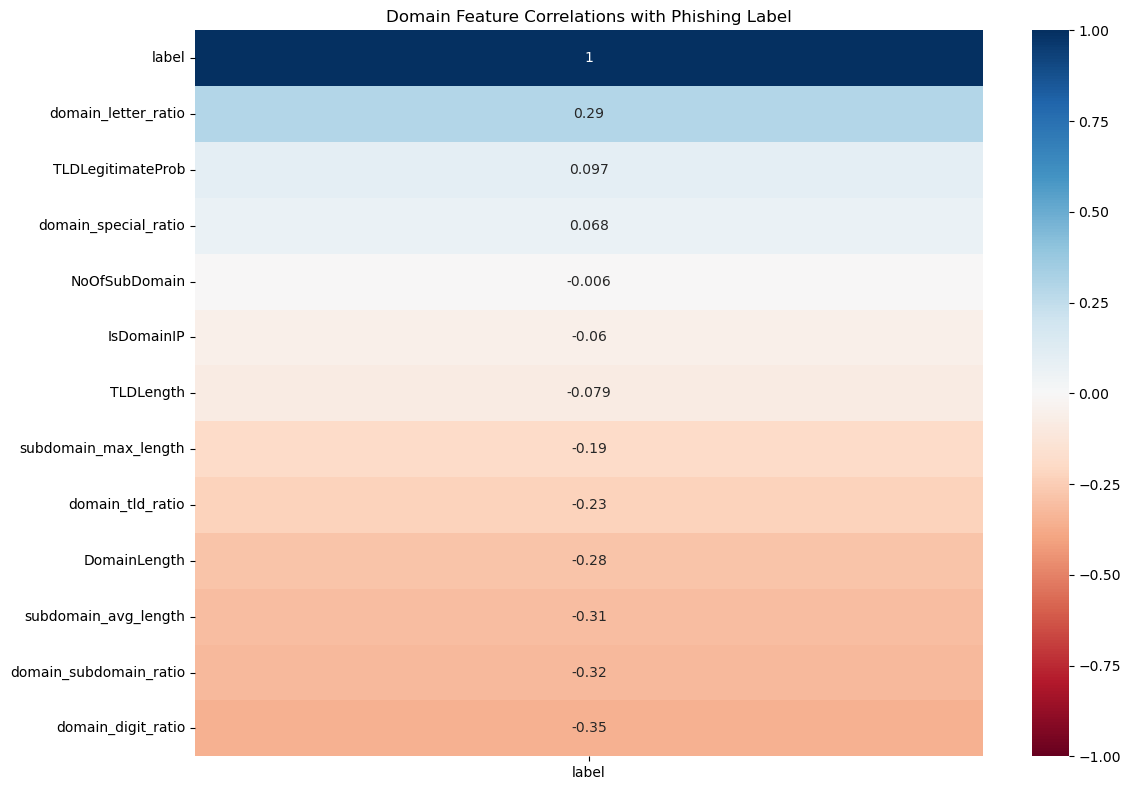


Domain Feature Correlations with Phishing Label:
label                     1.000000
domain_letter_ratio       0.294790
TLDLegitimateProb         0.097389
domain_special_ratio      0.067558
NoOfSubDomain            -0.005955
IsDomainIP               -0.060202
TLDLength                -0.079159
subdomain_max_length     -0.191129
domain_tld_ratio         -0.233718
DomainLength             -0.283152
subdomain_avg_length     -0.306975
domain_subdomain_ratio   -0.324697
domain_digit_ratio       -0.352253
Name: label, dtype: float64


In [48]:
def analyze_domain_correlations(df):
	"""
	Analyze and visualize correlations between domain features and phishing label.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing domain features and phishing label
	
	Returns:
	--------
	pandas.Series
		Sorted correlations between features and phishing label
	
	Notes:
	------
	- Analyzes correlations for both basic and advanced domain features
	- Visualizes correlations using a heatmap
	- Features are sorted by correlation strength
	"""
	# Define key domain-related features
	domain_features = [
		# Basic domain metrics
		'DomainLength', 'IsDomainIP', 'TLDLength', 
		'NoOfSubDomain', 'TLDLegitimateProb',
		
		# Character composition features
		'domain_letter_ratio', 'domain_digit_ratio',
		'domain_special_ratio',
		
		# Subdomain analysis
		'subdomain_avg_length', 'subdomain_max_length',
		
		# Component relationships
		'domain_tld_ratio', 'domain_subdomain_ratio'
	]
	
	# Calculate and sort correlations
	correlations = (df[domain_features + ['label']]
				   .corr()['label']
				   .sort_values(ascending=False))
	
	# Visualization
	plt.figure(figsize=(12, 8))
	sns.heatmap(
		df[domain_features + ['label']]
		.corr()[['label']]
		.sort_values(by='label', ascending=False),
		annot=True,
		cmap='RdBu',
		vmin=-1,
		vmax=1
	)
	plt.title('Domain Feature Correlations with Phishing Label')
	plt.tight_layout()
	plt.show()
	
	return correlations

# Execute correlation analysis 
domain_correlations = analyze_domain_correlations(df)
print("\nDomain Feature Correlations with Phishing Label:")
print(domain_correlations)

<font color='#FFB703'>1. Group Features by Correlation Strength</font>

- Strong (>0.5): 
- Moderate (0.3-0.5): domain_letter_ratio, domain_subdomain_ratio, domain_digit_ratio
- Weak (<0.2): remaining features, DomainLength, domain_tld_ratio

<font color='#FFB703'>2. Visualization Steps</font>
- Create violin plots for each correlation group
- Compare distributions between phishing/legitimate
- Analyze feature importance

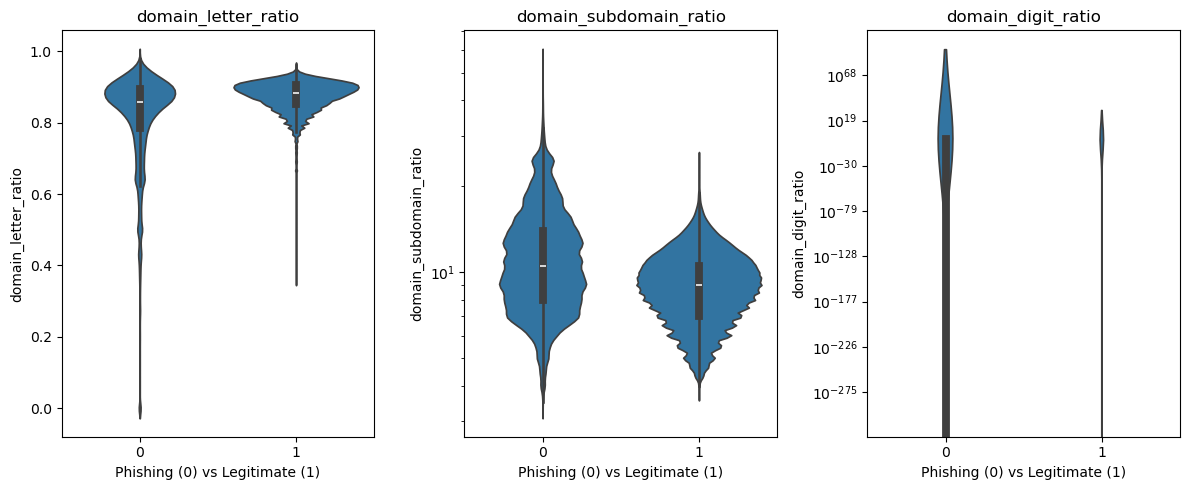


Moderately correlated domain features: ['domain_letter_ratio', 'domain_subdomain_ratio', 'domain_digit_ratio']


In [49]:
def visualize_domain_features(df):
	"""
	Visualize domain feature distributions for moderate correlations using violin plots.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing domain features and label
		
	Returns:
	--------
	list
		List of moderately correlated features analyzed
	"""
	# Only moderate correlations (0.2-0.5)
	moderate_features = [
		'domain_letter_ratio', 
		'domain_subdomain_ratio', 
		'domain_digit_ratio'
	]
	
	# Create figure
	plt.figure(figsize=(12, 5))
	
	# Plot moderate correlations
	for idx, feature in enumerate(moderate_features):
		plt.subplot(1, len(moderate_features), idx+1)
		if feature in ['domain_subdomain_ratio', 'domain_digit_ratio']:
			plt.yscale('log')
		sns.violinplot(x='label', y=feature, data=df)
		plt.title(f'{feature}')
		plt.xlabel('Phishing (0) vs Legitimate (1)')
	
	plt.tight_layout()
	plt.show()
	
	return moderate_features

# Execute visualization
moderate_domain_features = visualize_domain_features(df)
print("\nModerately correlated domain features:", moderate_domain_features)

From observations, it seems that `domain_digit_ratio` is unsuitable for use later on, as it suffers from extreme outliers. `domain_letter_ratio` and `domain_subdomain_ratio` on the other hand, although also suffering from outliers in the case of `domain_letter_ratio`, has a much better distribution.

#### <font color='#FFB703'>Content Features</font>
These features analyze webpage content patterns common in phishing sites

In [50]:
def create_content_features(df):
	"""
	Create advanced content analysis features for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing content-related columns:
		- Title: webpage title text
		- URLLength: length of URL
		- NoOfImage: number of images
		- NoOfCSS: number of CSS files
		- NoOfJS: number of JavaScript files
		- CharContinuationRate: character continuation rate
		- NoOfObfuscatedChar: number of obfuscated characters
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new content features added:
		- title_length: Length of page title
		- title_word_count: Number of words in title
		- title_char_ratio: Title length relative to URL length
		- resource_count: Total number of resources (images + CSS + JS)
		- image_resource_ratio: Ratio of images to total resources
		- css_js_ratio: Ratio of CSS to JS files
		- content_complexity: Composite score of content complexity
	"""
	df = df.copy()  # Create copy to avoid SettingWithCopyWarning
	
	# Title analysis - vectorized operations
	df['title_length'] = df['Title'].str.len()
	df['title_word_count'] = df['Title'].str.split().str.len()
	df['title_char_ratio'] = df['title_length'] / df['URLLength'].replace(0, 1)
	
	# Resource analysis - efficient calculations
	df['resource_count'] = df[['NoOfImage', 'NoOfCSS', 'NoOfJS']].sum(axis=1)
	df['image_resource_ratio'] = df['NoOfImage'] / df['resource_count'].replace(0, 1)
	df['css_js_ratio'] = df['NoOfCSS'] / df['NoOfJS'].replace(0, 1)
	
	# Content complexity score
	df['content_complexity'] = (
		df['CharContinuationRate'] * 
		df['NoOfObfuscatedChar'] * 
		(df['resource_count'] + 1)  # Add 1 to avoid multiplying by zero
	)
	
	return df

# Implementation
df = create_content_features(df)
display(df[['title_length', 'title_word_count', 'title_char_ratio', 
	'resource_count', 'image_resource_ratio', 'css_js_ratio', 
	'content_complexity']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['title_length', 'title_word_count', 'title_char_ratio', 
	'resource_count', 'image_resource_ratio', 'css_js_ratio', 
	'content_complexity']].isnull().sum())

,title_length,title_word_count,title_char_ratio,resource_count,image_resource_ratio,css_js_ratio,content_complexity
0,487,14,15.709677,82,0.414634,0.714286,0.0
1,37,3,1.608696,67,0.746269,1.125000,0.0
2,20,3,0.689655,19,0.526316,0.285714,0.0
3,51,8,1.961538,45,0.066667,1.800000,0.0
4,30,3,0.909091,293,0.832765,0.441176,0.0



Missing values check:
title_length            0
title_word_count        0
title_char_ratio        0
resource_count          0
image_resource_ratio    0
css_js_ratio            0
content_complexity      0
dtype: int64


In [51]:
df[['title_length', 'title_word_count', 'title_char_ratio',
    'resource_count', 'image_resource_ratio', 'css_js_ratio',
	'content_complexity']].describe()

,title_length,title_word_count,title_char_ratio,resource_count,image_resource_ratio,css_js_ratio,content_complexity
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,15.920109,1.000534,0.406047,42.931105,0.344776,0.504611,0.245425
std,32.875314,0.062053,0.209789,127.034954,0.322548,4.517784,37.467103
min,1.000000,1.000000,0.000164,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,0.423077,23.000000,0.333333,0.285714,0.000000
75%,17.000000,1.000000,0.531250,59.000000,0.614286,0.666667,0.000000
max,4136.000000,14.000000,15.709677,44793.000000,1.000000,2107.058824,10728.000000


#### <font color='#FFB703'>Title Feature Analysis</font>
Title characteristics often differ between legitimate and phishing sites:
- Length patterns
- Word complexity
- Domain matching

In [52]:
def create_title_features(df):
	"""
	Create title-based features for phishing detection analysis.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing URL metadata with 'Title' and 'DomainTitleMatchScore' columns
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new title-based features:
		- title_length: Length of page title
		- title_word_count: Number of words in title
		- title_match_ratio: Score of title matching with domain, normalized by title length
		
	Notes:
	------
	- Handles missing values by filling with empty strings
	- Word count uses whitespace as delimiter
	- Match ratio is normalized to avoid bias from title length
	"""
	df = df.copy()  # Avoid SettingWithCopyWarning
	
	# Clean and calculate basic title metrics
	df['title_length'] = df['Title'].fillna('').str.len()
	df['title_word_count'] = df['Title'].fillna('').str.count('\\s+') + 1
	
	# Calculate normalized match ratio (add 1 to avoid division by zero)
	df['title_match_ratio'] = df['DomainTitleMatchScore'] / (df['title_length'] + 1)
	
	return df

# Implementation
df = create_title_features(df)
display(df[['title_length', 'title_word_count', 'title_match_ratio']].head())

# Validate no missing values
print("\nMissing values check:")
print(df[['title_length', 'title_word_count', 'title_match_ratio']].isnull().sum())

,title_length,title_word_count,title_match_ratio
0,487,14,0.000000
1,37,3,1.461988
2,20,3,2.222222
3,51,9,0.000000
4,30,3,3.225806



Missing values check:
title_length         0
title_word_count     0
title_match_ratio    0
dtype: int64


In [53]:
# Display basic statistics
df[['title_length', 'title_word_count', 'title_match_ratio']].describe()

,title_length,title_word_count,title_match_ratio
count,235795.000000,235795.000000,235795.000000
mean,15.920109,1.000539,5.034837
std,32.875314,0.062563,5.931232
min,1.000000,1.000000,0.000000
25%,6.000000,1.000000,0.000000
50%,11.000000,1.000000,4.000000
75%,17.000000,1.000000,9.090909
max,4136.000000,14.000000,50.000000


#### <font color='#FFB703'>Resource Analysis</font>
Phishing sites often have different resource patterns than legitimate sites:
- Image counts
- CSS/JS distributions
- Resource ratios

In [54]:
def create_resource_features(df):
	"""
	Create features based on webpage resource patterns for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing resource-related columns:
		- NoOfImage: Number of images
		- NoOfCSS: Number of CSS files
		- NoOfJS: Number of JavaScript files
	
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new resource-based features:
		- total_resources: Total count of images, CSS and JS files
		- image_ratio: Proportion of images to total resources
		- css_js_ratio: Ratio of CSS to JavaScript files
	
	Notes:
	------
	- Adds 1 to denominators to avoid division by zero
	- All calculations use vectorized operations for efficiency
	"""
	df = df.copy()
	
	# Calculate total resources
	df['total_resources'] = df[['NoOfImage', 'NoOfCSS', 'NoOfJS']].sum(axis=1)
	
	# Calculate ratios with protection against zero division
	df['image_ratio'] = df['NoOfImage'] / df['total_resources'].replace(0, 1)
	df['css_js_ratio'] = df['NoOfCSS'] / df['NoOfJS'].replace(0, 1)
	
	return df

# Implementation
df = create_resource_features(df)
display(df[['total_resources', 'image_ratio', 'css_js_ratio']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['total_resources', 'image_ratio', 'css_js_ratio']].isnull().sum())

,total_resources,image_ratio,css_js_ratio
0,82,0.414634,0.714286
1,67,0.746269,1.125000
2,19,0.526316,0.285714
3,45,0.066667,1.800000
4,293,0.832765,0.441176



Missing values check:
total_resources    0
image_ratio        0
css_js_ratio       0
dtype: int64


In [55]:
df[['total_resources', 'image_ratio', 'css_js_ratio']].describe()

,total_resources,image_ratio,css_js_ratio
count,235795.000000,235795.000000,235795.000000
mean,42.931105,0.344776,0.504611
std,127.034954,0.322548,4.517784
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,23.000000,0.333333,0.285714
75%,59.000000,0.614286,0.666667
max,44793.000000,1.000000,2107.058824


#### <font color='#FFB703'>Content Pattern Analysis</font>
Analyzing obfuscation and complexity patterns:
- Character patterns
- Obfuscation metrics
- Overall complexity

In [56]:
def create_pattern_features(df):
    """
    Create features based on content pattern analysis for phishing detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing URL content pattern metrics:
        - NoOfObfuscatedChar: Count of obfuscated characters
        - URLLength: Total URL length
        - CharContinuationRate: Rate of continuous similar characters
        - total_resources: Total count of resources (images + CSS + JS)
        - title_match_ratio: Ratio of title matching with domain
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new pattern-based features:
        - obfuscation_ratio: Ratio of obfuscated characters to URL length
        - char_continuation_density: Combined metric of character patterns
        - content_complexity: Composite score of content complexity
    
    Notes:
    ------
    - Handles zero division cases safely
    - Uses vectorized operations for efficiency
    - Complexity score combines multiple pattern metrics
    """
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    
    # Calculate obfuscation ratio with safe division
    df['obfuscation_ratio'] = df['NoOfObfuscatedChar'] / df['URLLength']
    
    # Calculate character pattern density
    df['char_continuation_density'] = (
        df['CharContinuationRate'] * df['obfuscation_ratio']
    )
    
    # Calculate composite complexity score
    df['content_complexity'] = (
        df['total_resources'] * 
        df['char_continuation_density'] * 
        (df['title_match_ratio'] + 1)  # Add 1 to avoid zero multiplication
    )
    
    return df

# Implementation
df = create_pattern_features(df)
display(df[['obfuscation_ratio', 'char_continuation_density', 'content_complexity']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['obfuscation_ratio', 'char_continuation_density', 'content_complexity']].isnull().sum())

,obfuscation_ratio,char_continuation_density,content_complexity
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0



Missing values check:
obfuscation_ratio            0
char_continuation_density    0
content_complexity           0
dtype: int64


In [57]:
df[['obfuscation_ratio', 'char_continuation_density', 'content_complexity']].describe()

,obfuscation_ratio,char_continuation_density,content_complexity
count,235795.000000,235795.000000,235795.000000
mean,0.000138,0.000099,0.000677
std,0.003816,0.003045,0.040753
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.348214,0.278571,9.310345


#### <font color='#FFB703'>Content Feature Correlation Analysis</font>

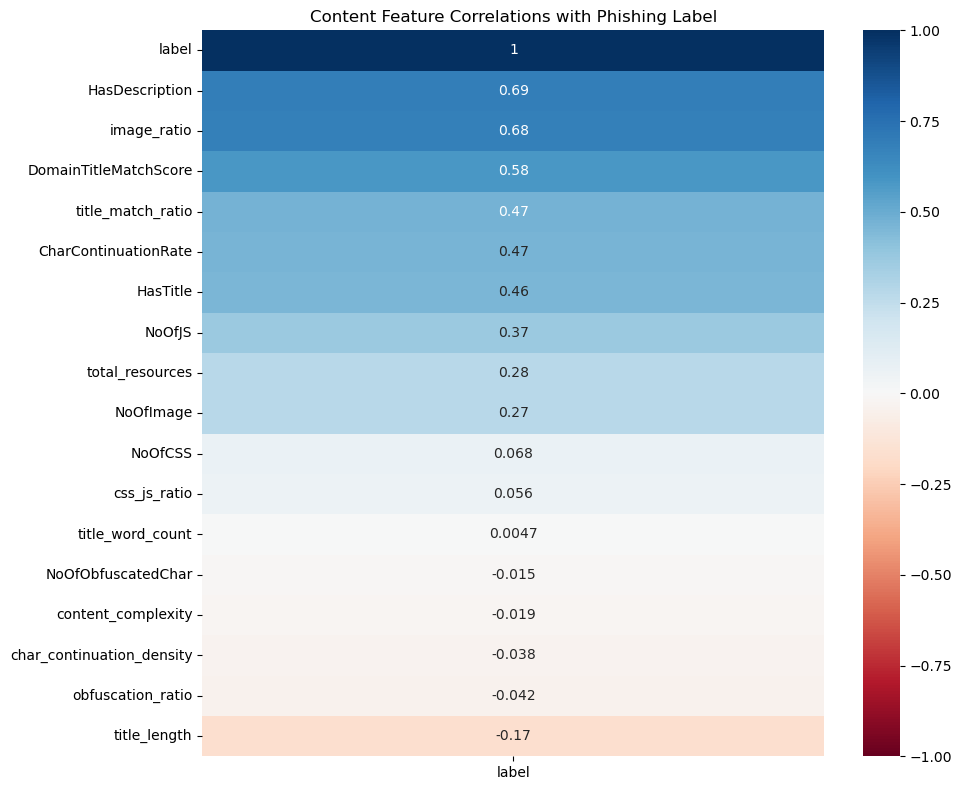


Content Feature Correlations with Phishing Label:
label                        1.000000
HasDescription               0.690232
image_ratio                  0.684182
DomainTitleMatchScore        0.584905
title_match_ratio            0.474568
CharContinuationRate         0.467735
HasTitle                     0.459725
NoOfJS                       0.373500
total_resources              0.277433
NoOfImage                    0.274658
NoOfCSS                      0.068109
css_js_ratio                 0.055700
title_word_count             0.004709
NoOfObfuscatedChar          -0.015315
content_complexity          -0.019196
char_continuation_density   -0.037731
obfuscation_ratio           -0.041898
title_length                -0.170801
Name: label, dtype: float64


In [58]:
def analyze_content_correlations(df):
	"""
	Analyze and visualize correlations between content features and phishing label.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		DataFrame containing URL and content features with phishing labels
	
	Returns:
	--------
	pandas.Series
		Sorted correlations between content features and phishing label
	"""
	
	# Define key content-related features 
	content_features = [
		# Title-related features
		'title_length', 'title_word_count', 'title_match_ratio',
		'DomainTitleMatchScore', 'HasTitle',
		
		# Resource-related features
		'total_resources', 'image_ratio', 'css_js_ratio',
		'NoOfImage', 'NoOfCSS', 'NoOfJS',
		
		# Content characteristics
		'obfuscation_ratio', 'char_continuation_density', 
		'content_complexity', 'CharContinuationRate',
		'NoOfObfuscatedChar', 'HasDescription'
	]
	
	# Calculate and sort correlations with label
	correlations = (df[content_features + ['label']]
				   .corr()['label']
				   .sort_values(ascending=False))
	
	# Visualize correlation heatmap
	plt.figure(figsize=(10, 8))
	sns.heatmap(
		df[content_features + ['label']]
		.corr()[['label']]
		.sort_values(by='label', ascending=False),
		annot=True,
		cmap='RdBu',
		vmin=-1, 
		vmax=1
	)
	plt.title('Content Feature Correlations with Phishing Label')
	plt.tight_layout()
	plt.show()
	
	return correlations

# Execute correlation analysis
content_correlations = analyze_content_correlations(df)
print("\nContent Feature Correlations with Phishing Label:")
print(content_correlations)

From the above correlation heatmap, we can categorise the features into the following categories:

<font color='#FFB703'>Strong Correlation (>0.5)</font>
- HasDescription (0.69)
- image_ratio (0.68)
- DomainTitleMatchScore (0.58)
- title_match_ratio (0.55)

<font color='#FFB703'>Moderate Correlation (0.3-0.5)</font>
- CharContinuationRate (0.47)
- HasTitle (0.46)
- NoOfJS (0.37)

<font color='#FFB703'>Weak Correlation (<0.3)</font>
- Rest of features

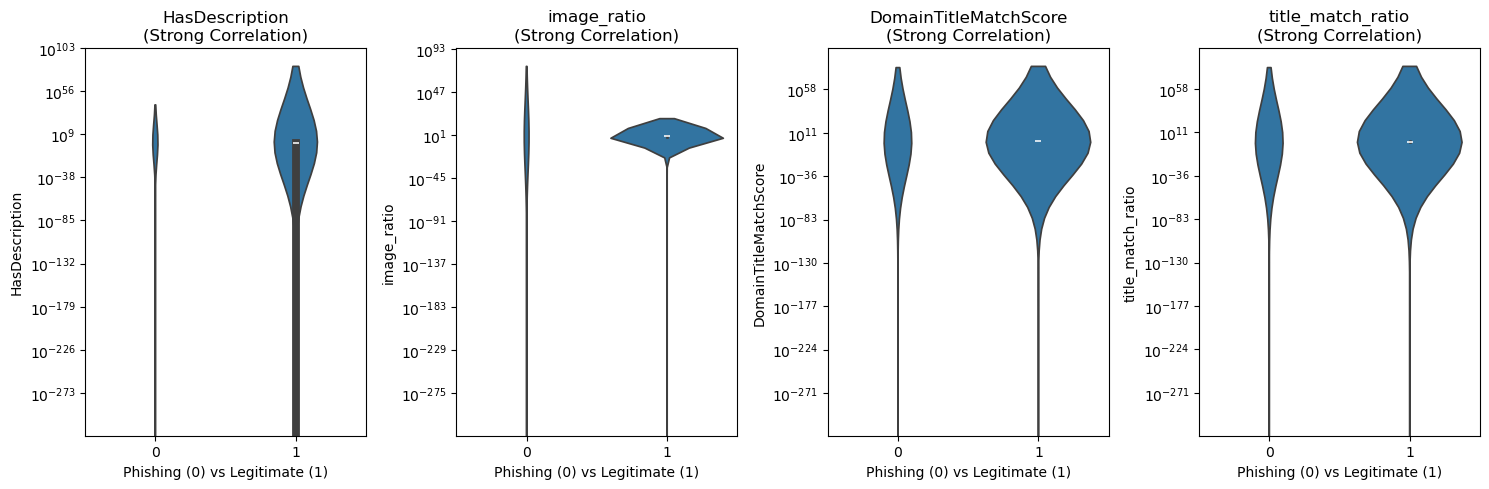

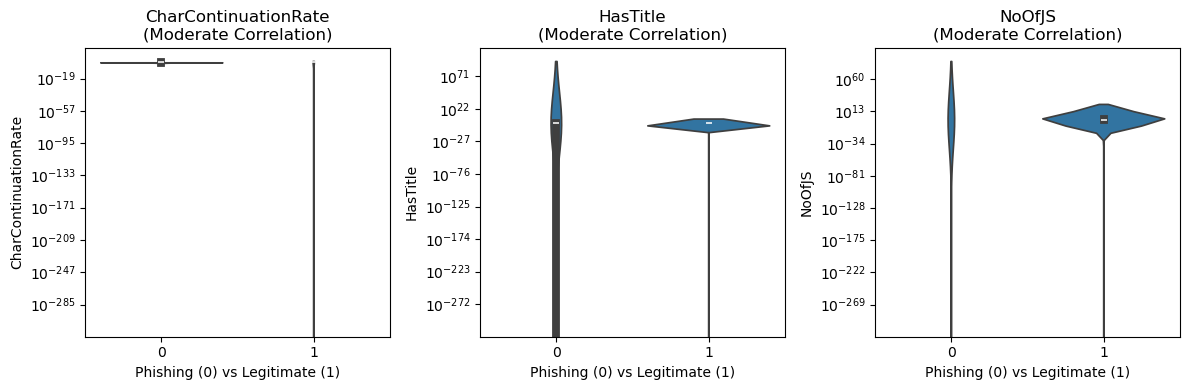

In [59]:
def visualize_content_correlations(df):
    """
    Create separate visualizations for strong and moderate correlation features.
    """
    # Define feature groups
    strong_features = [
        'HasDescription', 'image_ratio',
        'DomainTitleMatchScore', 'title_match_ratio'
    ]
    
    moderate_features = [
        'CharContinuationRate', 'HasTitle', 'NoOfJS'
    ]
    
    # Create figure for strong correlations
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(strong_features):
        plt.subplot(1, 4, i+1)
        plt.yscale('log')  # Set log scale 
        sns.violinplot(data=df, x='label', y=feature)
        plt.title(f'{feature}\n(Strong Correlation)')
        plt.xlabel('Phishing (0) vs Legitimate (1)')
    plt.tight_layout()
    plt.show()
    
    # Create figure for moderate correlations
    plt.figure(figsize=(12, 4))
    for i, feature in enumerate(moderate_features):
        plt.subplot(1, 3, i+1)
        plt.yscale('log')  # Set log scale 
        sns.violinplot(data=df, x='label', y=feature)
        plt.title(f'{feature}\n(Moderate Correlation)')
        plt.xlabel('Phishing (0) vs Legitimate (1)')
    plt.tight_layout()
    plt.show()
    
    return strong_features + moderate_features

# Execute visualization
important_content_features = visualize_content_correlations(df)


From observations, we can conclude that the logarithmic version of `DomainTileMatchScore` and `tile_match_ratio` have the strongest correlation and have the best spread of values, thus they are the most suitable to be used for the model later on.

#### <font color='#FFB703'>Security Feature Engineering</font>
Creating security-based features to detect phishing patterns

In [60]:
def create_security_features(df):
	"""
	Create advanced security analysis features for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing security-related columns:
		- IsHTTPS: Binary indicator for HTTPS usage
		- HasPasswordField: Binary indicator for password field presence
		- Crypto: Binary indicator for cryptographic elements
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new security features:
		- is_secure: Normalized HTTPS indicator
		- has_password: Normalized password field indicator
		- security_score: Composite security score (0-2.5)
		- security_risk: Risk score based on security factors (0-1)
	"""
	df = df.copy()  # Create copy to avoid SettingWithCopyWarning
	
	# Convert security indicators to consistent numeric format
	security_features = ['IsHTTPS', 'HasPasswordField', 'Crypto']
	for feature in security_features:
		df[feature] = df[feature].astype(int)
	
	# Create normalized security metrics
	df['is_secure'] = df['IsHTTPS']
	df['has_password'] = df['HasPasswordField']
	
	# Calculate composite security score
	# Weights: HTTPS=1.0, Password=0.5, Crypto=1.0
	df['security_score'] = (
		df['is_secure'] + 
		df['has_password'] * 0.5 + 
		df['Crypto']
	)
	
	# Calculate risk score (higher means more risky)
	# Risk factors: no HTTPS + has password + no crypto
	df['security_risk'] = (
		(1 - df['is_secure']) * 
		df['has_password'] * 
		(1 - df['Crypto'])
	)
	
	return df

# Implementation
df = create_security_features(df)
display(df[['is_secure', 'has_password', 'security_score', 'security_risk']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['is_secure', 'has_password', 'security_score', 'security_risk']].isnull().sum())

,is_secure,has_password,security_score,security_risk
0,1,0,1.0,0
1,1,0,1.0,0
2,1,0,1.0,0
3,1,0,2.0,0
4,1,0,1.0,0



Missing values check:
is_secure         0
has_password      0
security_score    0
security_risk     0
dtype: int64


In [61]:
df[['is_secure', 'has_password', 'security_score', 'security_risk']].describe()

,is_secure,has_password,security_score,security_risk
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.782625,0.102263,0.857230,0.005734
std,0.412461,0.302994,0.491253,0.075505
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,2.500000,1.000000


##### <font color='#FFB703'>Core Security Features</font>
1. HTTPS Analysis
  - Protocol verification
  - Certificate checks
2.  Password Field Analysis
  - Form detection
  - Input field patterns
3. Crypto Patterns
  - Cryptocurrency mentions
  - Blockchain terms

In [62]:
def analyze_security_features(df):
    """
    Analyze and create comprehensive security features for phishing detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing security columns:
        - IsHTTPS: Binary indicator for HTTPS usage
        - HasPasswordField: Binary indicator for password field
        - Crypto: Binary indicator for crypto elements
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new security features added:
        - protocol_secure: HTTPS indicator (0/1)
        - protocol_risk: Inverse of protocol_secure
        - has_password: Password field presence
        - password_with_https: Password fields with HTTPS
        - has_crypto: Cryptocurrency indicator
        - crypto_risk: Crypto without HTTPS
        - security_score: Combined security rating
    """
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    
    # Protocol analysis (single binary conversion)
    df['protocol_secure'] = df['IsHTTPS'].astype(int)
    df['protocol_risk'] = 1 - df['protocol_secure']
    
    # Password field analysis
    df['has_password'] = df['HasPasswordField'].astype(int)
    df['password_with_https'] = df['has_password'] * df['protocol_secure']
    
    # Cryptocurrency analysis 
    df['has_crypto'] = df['Crypto'].astype(int)
    df['crypto_risk'] = df['has_crypto'] * df['protocol_risk']
    
    # Combined security score (weighted sum of positive indicators)
    df['security_score'] = (
        df['protocol_secure'] +
        df['password_with_https'] +
        (1 - df['crypto_risk'])
    )
    
    return df

# Implementation and validation
df = analyze_security_features(df)
security_columns = [
    'protocol_secure', 'protocol_risk', 'has_password',
    'password_with_https', 'has_crypto', 'crypto_risk',
    'security_score'
]

# Display results
display(df[security_columns].head())

# Verify no missing values
print("\nMissing values check:")
print(df[security_columns].isnull().sum())

,protocol_secure,protocol_risk,has_password,password_with_https,has_crypto,crypto_risk,security_score
0,1,0,0,0,0,0,2
1,1,0,0,0,0,0,2
2,1,0,0,0,0,0,2
3,1,0,0,0,1,0,2
4,1,0,0,0,0,0,2



Missing values check:
protocol_secure        0
protocol_risk          0
has_password           0
password_with_https    0
has_crypto             0
crypto_risk            0
security_score         0
dtype: int64


In [63]:
df[['protocol_secure', 'protocol_risk', 'has_password',
	'password_with_https', 'has_crypto', 'crypto_risk',
	'security_score']].describe()

,protocol_secure,protocol_risk,has_password,password_with_https,has_crypto,crypto_risk,security_score
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.782625,0.217375,0.102263,0.096448,0.023474,0.001234,1.877839
std,0.412461,0.412461,0.302994,0.295206,0.151403,0.035108,0.550094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


#### <font color='#FFB703'>Security Feature Correlation Analysis</font>

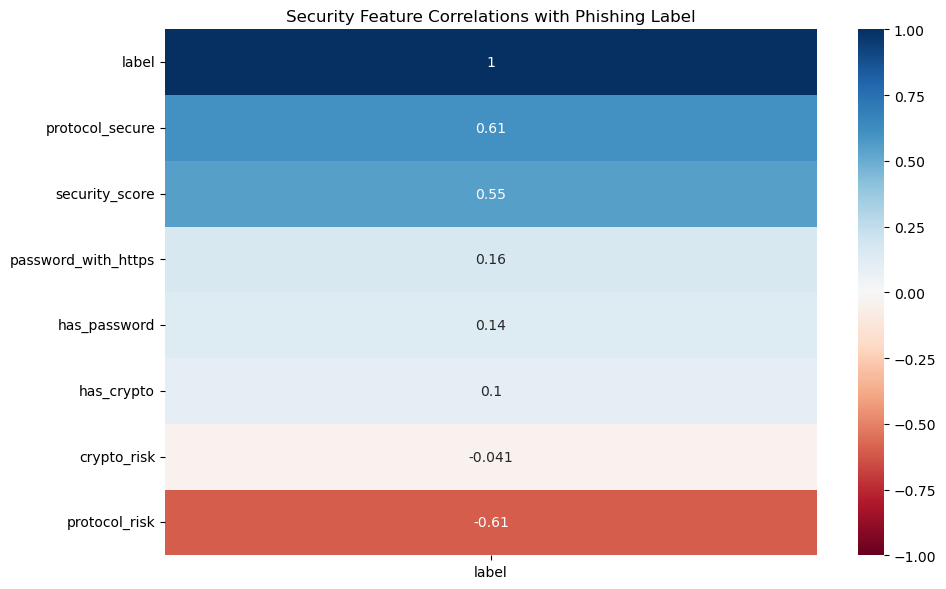


Security Feature Correlations with Phishing Label:
label                  1.000000
protocol_secure        0.609132
security_score         0.547649
password_with_https    0.164593
has_password           0.138183
has_crypto             0.099610
crypto_risk           -0.040628
protocol_risk         -0.609132
Name: label, dtype: float64


In [64]:
def analyze_security_correlations(df):
    """
    Analyze and visualize correlations between security features and phishing label.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing security features and phishing labels
        Required columns: ['protocol_secure', 'protocol_risk', 'has_password',
                         'password_with_https', 'has_crypto', 'crypto_risk',
                         'security_score', 'label']
    
    Returns:
    --------
    pandas.Series
        Series containing correlations between security features and phishing label,
        sorted by correlation strength
    """
    # Define key security features for analysis
    security_features = [
        'protocol_secure',      # HTTPS indicator
        'protocol_risk',        # Inverse of HTTPS usage
        'has_password',         # Password field presence
        'password_with_https',  # Secure password fields
        'has_crypto',          # Cryptocurrency presence
        'crypto_risk',         # Crypto without HTTPS
        'security_score'        # Combined security rating
    ]
    
    # Calculate correlations with label and sort by strength
    correlations = (df[security_features + ['label']]
                   .corr()['label']
                   .sort_values(ascending=False))
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df[security_features + ['label']]
        .corr()[['label']]
        .sort_values(by='label', ascending=False),
        annot=True,
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        center=0
    )
    plt.title('Security Feature Correlations with Phishing Label')
    plt.tight_layout()
    plt.show()
    
    return correlations

# Execute correlation analysis
security_correlations = analyze_security_correlations(df)
print("\nSecurity Feature Correlations with Phishing Label:")
print(security_correlations)

##### <font color='#FFB703'>Correlation Groups</font>
<font color='#FFB703'>Strong (>0.5)</font>
- protocol_secure (0.61)
- security_score (0.55)
- protocol_risk (-0.61)

<font color='#FFB703'>Weak (<0.3)</font>
- password_with_https (0.16)
- has_password (0.14)
- has_crypto (0.10)
- crypto_risk (-0.04)

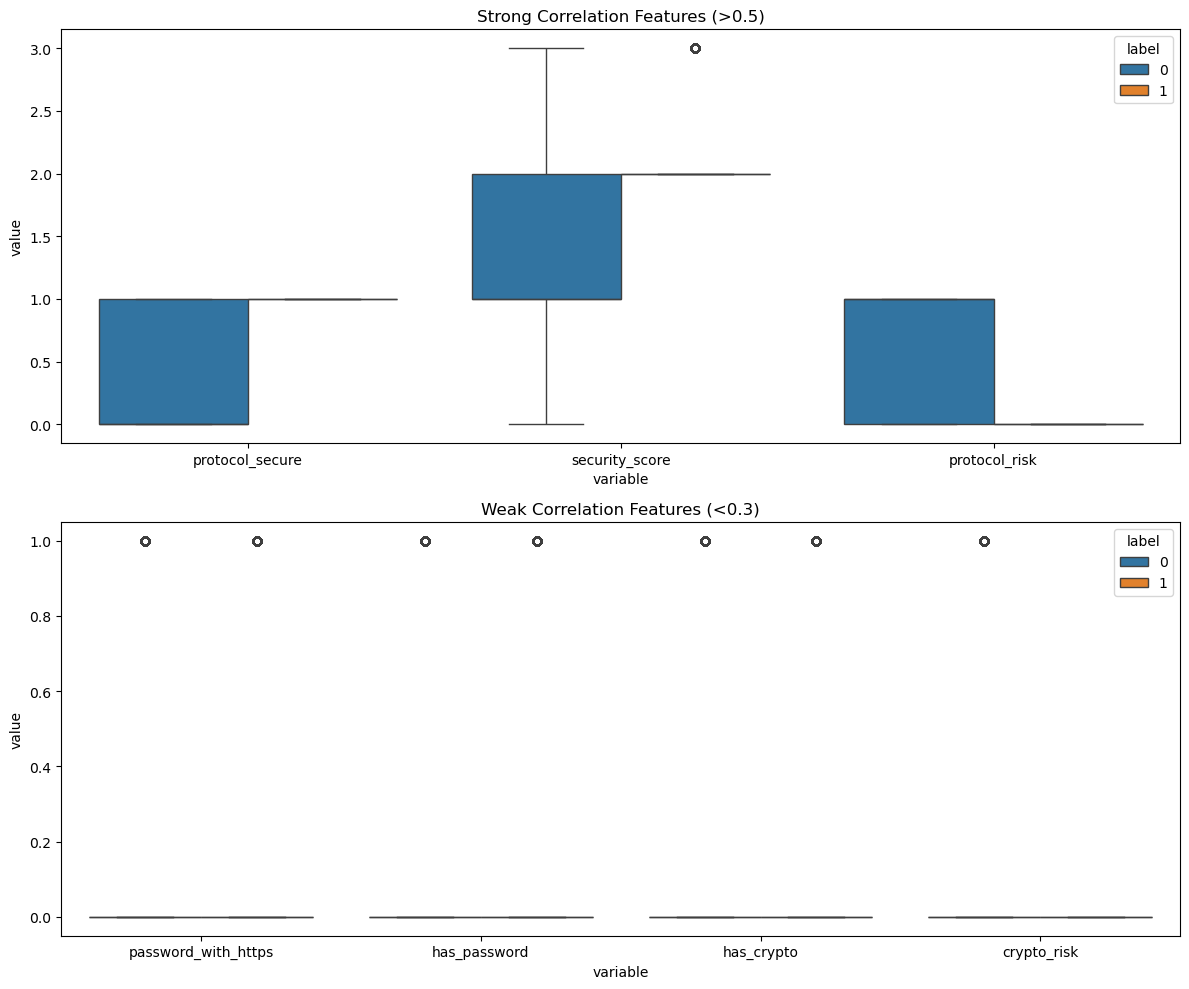

Most important security features: ['protocol_secure', 'security_score', 'protocol_risk']


In [65]:
def visualize_security_correlations(df):
    # Group features
    strong_features = ['protocol_secure', 'security_score', 'protocol_risk']
    weak_features = ['password_with_https', 'has_password', 'has_crypto', 'crypto_risk']
    
    # Create plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Strong correlations
    sns.boxplot(data=df.melt(
        id_vars=['label'],
        value_vars=strong_features
    ), x='variable', y='value', hue='label', ax=axes[0])
    axes[0].set_title('Strong Correlation Features (>0.5)')
    
    # Weak correlations
    sns.boxplot(data=df.melt(
        id_vars=['label'],
        value_vars=weak_features
    ), x='variable', y='value', hue='label', ax=axes[1])
    axes[1].set_title('Weak Correlation Features (<0.3)')
    
    plt.tight_layout()
    plt.show()
    
    return strong_features

# Execute visualization
important_security_features = visualize_security_correlations(df)
print("Most important security features:", important_security_features)

Since `protocol_secure` and `protocol_risk` are the same variable, just the inverse of the other, we count only one of them, in this case we choose to use `protocol_secure`, whereas `security_score` ranges from 0 to 3, with steps of 1.

#### <font color='#FFB703'>Navigation Feature Engineering Plan</font>
1. Basic Reference Analysis
  - Count ratios
  - External vs internal refs
  - Empty ref patterns
2. Form Submission Features
  - External form analysis
  - Submission patterns
  - Risk indicators
3. Redirect Analysis
  - Self-redirect patterns
  - Redirect chains
  - Risk scoring

##### <font color='#FFB703'>Reference Pattern Analysis</font>
Analyzing URL reference patterns common in phishing sites

In [66]:
def analyze_references(df):
	"""
	Creates features analyzing URL reference patterns for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing columns:
		- NoOfExternalRef: Count of external references
		- NoOfSelfRef: Count of self-references  
		- NoOfEmptyRef: Count of empty references
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new reference features:
		- total_refs: Total number of references
		- external_ref_ratio: Proportion of external references
		- self_ref_ratio: Proportion of self references
		- empty_ref_ratio: Proportion of empty references
	
	Notes:
	------
	- Adds 1 to denominators to avoid division by zero
	- All calculations use vectorized operations for efficiency
	"""
	df = df.copy()
	
	# Calculate total references once to avoid redundant computation 
	df['total_refs'] = df['NoOfExternalRef'] + df['NoOfSelfRef'] + df['NoOfEmptyRef']
	
	# Safely calculate ratios with vectorized operations
	total_plus_one = df['total_refs'] + 1  # Avoid division by zero
	
	df['external_ref_ratio'] = df['NoOfExternalRef'] / total_plus_one
	df['self_ref_ratio'] = df['NoOfSelfRef'] / total_plus_one
	df['empty_ref_ratio'] = df['NoOfEmptyRef'] / total_plus_one
	
	return df

# Implementation
df = analyze_references(df)
display(df[['total_refs', 'external_ref_ratio', 'self_ref_ratio', 'empty_ref_ratio']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['total_refs', 'external_ref_ratio', 'self_ref_ratio', 'empty_ref_ratio']].isnull().sum())

,total_refs,external_ref_ratio,self_ref_ratio,empty_ref_ratio
0,243,0.508197,0.487705,0.000000
1,256,0.844358,0.151751,0.000000
2,49,0.100000,0.840000,0.040000
3,54,0.563636,0.400000,0.018182
4,158,0.534591,0.452830,0.006289



Missing values check:
total_refs            0
external_ref_ratio    0
self_ref_ratio        0
empty_ref_ratio       0
dtype: int64


In [67]:
df[['total_refs', 'external_ref_ratio', 'self_ref_ratio', 'empty_ref_ratio']].describe()

,total_refs,external_ref_ratio,self_ref_ratio,empty_ref_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,115.877449,0.343604,0.342271,0.020930
std,272.402701,0.268102,0.307456,0.081351
min,-27343.000000,-2.590473,-2.579269,0.000000
25%,1.000000,0.043624,0.000000,0.000000
50%,35.000000,0.371429,0.400000,0.000000
75%,157.000000,0.517505,0.524367,0.007168
max,26686.000000,0.999925,0.999551,0.987179


##### <font color='#FFB703'>Form Submission Analysis</font>
Detecting suspicious form submission patterns

In [68]:
def analyze_forms(df):
	"""
	Create form submission analysis features for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing form-related columns:
		- HasExternalFormSubmit: Binary indicator for external form submission
		- external_ref_ratio: Ratio of external references 
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new form analysis features:
		- form_risk: Binary indicator of form submission risk
		- form_ref_risk: Combined risk score incorporating external references
	
	Notes:
	------
	- form_risk is based on presence of external form submission
	- form_ref_risk combines form risk with external reference patterns
	- Higher values indicate higher phishing risk
	"""
	df = df.copy()  # Create copy to avoid SettingWithCopyWarning
	
	# Create form risk indicator (vectorized conversion)
	df['form_risk'] = df['HasExternalFormSubmit'].astype(int)
	
	# Calculate combined risk score with external references
	df['form_ref_risk'] = df['form_risk'] * df['external_ref_ratio']
	
	return df

# Implementation
df = analyze_forms(df)
display(df[['form_risk', 'form_ref_risk']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['form_risk', 'form_ref_risk']].isnull().sum())

,form_risk,form_ref_risk
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0



Missing values check:
form_risk        0
form_ref_risk    0
dtype: int64


In [69]:
df[['form_risk', 'form_ref_risk']].describe()

,form_risk,form_ref_risk
count,235795.000000,235795.000000
mean,0.043987,0.021348
std,0.205067,0.105777
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,0.996377


##### <font color='#FFB703'>Redirect Pattern Analysis</font>
Analyzing redirect chains and patterns

In [70]:
def analyze_redirects(df):
	"""
	Create redirect-based features for phishing URL detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing columns:
		- NoOfSelfRedirect: Count of self-redirects
		- total_refs: Total number of references
		- form_risk: Binary indicator for form submission risk
		- external_ref_ratio: Ratio of external references
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new redirect-based features:
		- redirect_ratio: Proportion of self-redirects to total references
		- redirect_risk: Combined risk score for redirects and forms
		- navigation_risk_score: Composite navigation risk indicator
	
	Notes:
	------
	- Adds 1 to denominators to avoid division by zero
	- Uses vectorized operations for efficiency
	- Higher scores indicate higher risk
	"""
	df = df.copy()
	
	# Calculate redirect metrics using vectorized operations
	df['redirect_ratio'] = df['NoOfSelfRedirect'] / (df['total_refs'] + 1)
	
	# Calculate combined risks
	df['redirect_risk'] = df['redirect_ratio'] * df['form_risk']
	df['navigation_risk_score'] = (
		df['external_ref_ratio'] + 
		df['form_risk'] + 
		df['redirect_risk']
	)
	
	return df

# Implementation
df = analyze_redirects(df)
print("\nVerifying no missing values:")
print(df[['redirect_ratio', 'redirect_risk', 'navigation_risk_score']].isnull().sum())


Verifying no missing values:
redirect_ratio           0
redirect_risk            0
navigation_risk_score    0
dtype: int64


#### <font color='#FFB703'>Navigation Feature Correlation Analysis</font>

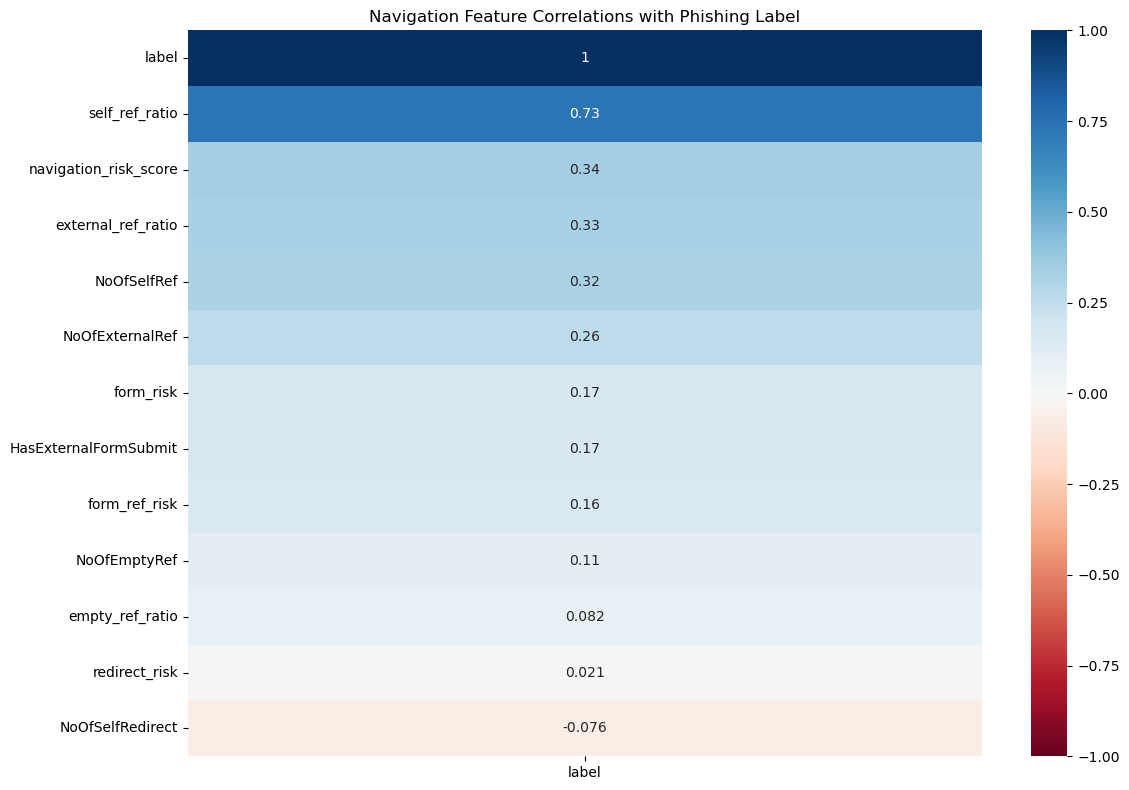


Navigation Feature Correlations with Phishing Label:
label                    1.000000
self_ref_ratio           0.730799
navigation_risk_score    0.343256
external_ref_ratio       0.327019
NoOfSelfRef              0.316211
NoOfExternalRef          0.258627
form_risk                0.167574
HasExternalFormSubmit    0.167574
form_ref_risk            0.159150
NoOfEmptyRef             0.109235
empty_ref_ratio          0.082416
redirect_risk            0.020985
NoOfSelfRedirect        -0.076463
Name: label, dtype: float64


In [71]:
def analyze_navigation_correlations(df):
	"""
	Analyze and visualize correlations between navigation features and phishing label.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		DataFrame containing navigation features and phishing label
		
	Returns:
	--------
	pandas.Series
		Sorted correlations between navigation features and phishing label
		
	Features Analyzed:
	-----------------
	- Reference patterns: external, self, empty ratios
	- Form submission: form risk, external forms
	- Redirect patterns: redirect risks, navigation scores
	"""
	
	# Define key navigation features to analyze
	nav_features = [
		# Reference ratios
		'external_ref_ratio', 'self_ref_ratio', 'empty_ref_ratio',
		
		# Form analysis 
		'form_risk', 'form_ref_risk',
		
		# Redirect patterns
		'redirect_risk', 'navigation_risk_score',
		
		# Raw counts for validation
		'NoOfSelfRedirect', 'HasExternalFormSubmit',
		'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
	]
	
	# Calculate and sort correlations 
	correlations = (df[nav_features + ['label']]
				   .corr()['label']
				   .sort_values(ascending=False))
	
	# Visualize correlations
	plt.figure(figsize=(12, 8))
	sns.heatmap(
		df[nav_features + ['label']]
		.corr()[['label']]
		.sort_values(by='label', ascending=False),
		annot=True,
		cmap='RdBu',
		vmin=-1,
		vmax=1
	)
	plt.title('Navigation Feature Correlations with Phishing Label')
	plt.tight_layout()
	plt.show()
	
	return correlations

# Execute correlation analysis
navigation_correlations = analyze_navigation_correlations(df)
print("\nNavigation Feature Correlations with Phishing Label:")
print(navigation_correlations)

<font color='#FFB703'>Strong (>0.5)</font>
- self_ref_ratio (0.73)

<font color='#FFB703'>Moderate (0.3-0.5)</font>
- navigation_risk_score (0.34)
- external_ref_ratio (0.33)
- NoOfSelfRef (0.32)

<font color='#FFB703'>Weak (<0.3)</font>
- Remaining features

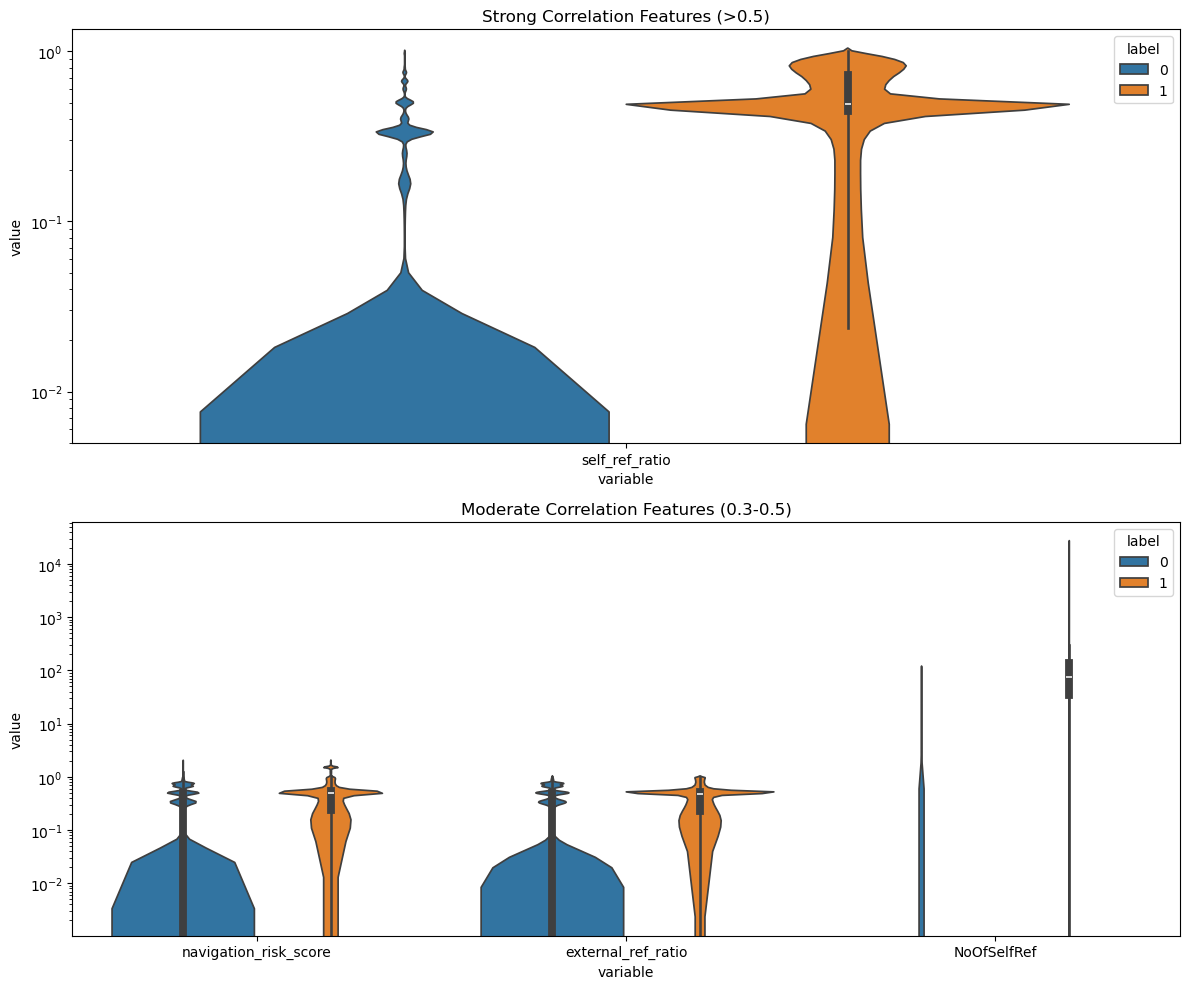

Most important navigation features: ['self_ref_ratio', 'navigation_risk_score', 'external_ref_ratio', 'NoOfSelfRef']


In [72]:
def visualize_navigation_correlations(df):
	"""
	Visualize navigation feature correlations by correlation strength using violin plots.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		DataFrame containing navigation features and phishing labels
		Required columns: ['self_ref_ratio', 'navigation_risk_score', 
						 'external_ref_ratio', 'NoOfSelfRef', 'label']
	
	Returns:
	--------
	list
		List of important navigation features by correlation strength
	"""
	# Define feature groups by correlation strength
	strong_features = ['self_ref_ratio']  # >0.5
	moderate_features = [  # 0.3-0.5
		'navigation_risk_score', 
		'external_ref_ratio', 
		'NoOfSelfRef'
	]
	
	# Create figure with two subplots vertically stacked
	fig, axes = plt.subplots(2, 1, figsize=(12, 10))
	
	# Plot features with strong correlations
	sns.violinplot(
		data=df.melt(
			id_vars=['label'],
			value_vars=strong_features
		), 
		x='variable', 
		y='value', 
		hue='label', 
		ax=axes[0]
	)
	axes[0].set_title('Strong Correlation Features (>0.5)')
	axes[0].set_yscale('log')
	
	# Plot features with moderate correlations
	sns.violinplot(
		data=df.melt(
			id_vars=['label'],
			value_vars=moderate_features
		), 
		x='variable', 
		y='value', 
		hue='label', 
		ax=axes[1]
	)
	axes[1].set_title('Moderate Correlation Features (0.3-0.5)')
	axes[1].set_yscale('log')
	
	plt.tight_layout()
	plt.show()
	
	# Return all important features
	return strong_features + moderate_features

# Execute visualization
important_navigation_features = visualize_navigation_correlations(df)
print("Most important navigation features:", important_navigation_features)

From observation, all the features here have great spread and `self_ref_ratio` specifically, has amazing correlation with the label

In [73]:
features = {
	'primary': [
		'URLSimilarityIndex',    # Score: 671857
		'HasSocialNet',          # Score: 376744
		'HasCopyrightInfo',      # Score: 291213
		'self_ref_ratio',        # Score: 270274
		'HasDescription',        # Score: 214554
		'image_ratio',           # Score: 207514
	],
	'secondary': [
		'path_entropy',          # Score: 172819
		'IsHTTPS',               # Score: 139101  # Choose one from the HTTPS-related features
		'DomainTitleMatchScore', # Score: 122616
		'HasSubmitButton',       # Score: 118640
		'IsResponsive'           # Score: 101521
	]
}

display(df[features['primary']].describe())
display(df[features['secondary']].describe())

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,self_ref_ratio,HasDescription,image_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,78.430778,0.456570,0.486775,0.342271,0.440183,0.344776
std,28.976055,0.498111,0.499826,0.307456,0.496410,0.322548
min,0.155574,0.000000,0.000000,-2.579269,0.000000,0.000000
25%,57.024793,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,0.400000,0.000000,0.333333
75%,100.000000,1.000000,1.000000,0.524367,1.000000,0.614286
max,100.000000,1.000000,1.000000,0.999551,1.000000,1.000000


,path_entropy,IsHTTPS,DomainTitleMatchScore,HasSubmitButton,IsResponsive
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.216236,0.782625,50.131427,0.414301,0.624513
std,0.384301,0.412461,49.676981,0.492602,0.484249
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,75.000000,0.000000,1.000000
75%,0.360825,1.000000,100.000000,1.000000,1.000000
max,1.000000,1.000000,100.000000,1.000000,1.000000


### <font color='#FFB703'>Predictive Modeling</font>

By using Analysis of Variance (ANOVA) F-Test, we are able to use the F-statistic to determine if the means to two or more groups are significatingly different via comparing the variability between groups to the variability within groups, then calculating the ratio of the larger variance estimate to the smaller variance estimate.

The reason the ANOVA F-Test was chosen, was due to the fact that it is an omnibus test, meaning it can detect any of several possible differences without having to pre-specify which comparisons to make. This makes our lives a lot easier, as we now have a metric to base our inference on.

In [74]:
def select_important_features(df):
    """
    Select most important features for phishing detection using ANOVA F-test.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features and target variable 'label'
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with features and their importance scores, sorted by score
        
    Notes:
    ------
    - Uses SelectKBest with f_classif for feature importance ranking
    - Automatically excludes non-numeric and target columns
    - Returns all features ranked by importance
    """
    
    # Get numeric columns excluding target
    feature_cols = df.select_dtypes(include=['number']).columns
    feature_cols = feature_cols.drop('label') if 'label' in feature_cols else feature_cols
    
    # Initialize and fit selector
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(df[feature_cols], df['label'])
    
    # Create and sort feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_cols,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)
    
    # Display top features
    print("\nTop 15 Most Important Features:")
    print(feature_scores.head(15))
    
    return feature_scores

# Execute feature selection
feature_importance = select_important_features(df)


Top 15 Most Important Features:
                   Feature          Score
3       URLSimilarityIndex  671857.021354
36            HasSocialNet  376744.060221
43        HasCopyrightInfo  291213.405607
101         self_ref_ratio  270274.049965
32          HasDescription  214554.534151
82    image_resource_ratio  207514.353516
87             image_ratio  207514.353516
64            path_entropy  172819.536182
95           protocol_risk  139101.470625
94         protocol_secure  139101.470625
21                 IsHTTPS  139101.470625
90               is_secure  139101.470625
25   DomainTitleMatchScore  122616.776204
37         HasSubmitButton  118640.503918
29            IsResponsive  101521.680953


Now that we have a list of the most important features to be used for our model, we must first make our final feature set that takes into account the rankings of each of these features

In [75]:
def create_feature_set(df):
    """
    Create final feature set for phishing detection modeling.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing all features
        
    Returns
    -------
    X_scaled : pandas.DataFrame
        Scaled feature matrix
    y : pandas.Series
        Target variable (labels)
    feature_list : list
        List of selected features
    
    Notes
    -----
    Features are selected based on ANOVA F-test scores:
    - Primary features (score > 200000)
    - Secondary features (100000 < score < 200000)
    All features are standardized using StandardScaler
    """
    
    # Define feature sets based on ANOVA F-test scores
    features = {
        'primary': [
            'URLSimilarityIndex',    # Score: 671857
            'HasSocialNet',          # Score: 376744
            'HasCopyrightInfo',      # Score: 291213
            'self_ref_ratio',        # Score: 270274
            'HasDescription',        # Score: 214554
            'image_ratio',           # Score: 207514
        ],
        'secondary': [
            'path_entropy',          # Score: 172819
            'IsHTTPS',               # Score: 139101  # Choose one from the HTTPS-related features
            'DomainTitleMatchScore', # Score: 122616
            'HasSubmitButton',       # Score: 118640
            'IsResponsive'           # Score: 101521
        ]
    }
    
    # Combine feature sets
    selected_features = features['primary'] + features['secondary']
    
    # Prepare feature matrix and target
    X = df[selected_features].copy()
    y = df['label'].copy()
    
    # Scale features
    X_scaled = pd.DataFrame(
        StandardScaler().fit_transform(X),
        columns=X.columns
    )
    
    return X_scaled, y, selected_features

# Execute feature selection
X, y, feature_list = create_feature_set(df)

# Display selected features info
print(f"\nSelected Features ({len(feature_list)}):")
print(feature_list)


Selected Features (11):
['URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo', 'self_ref_ratio', 'HasDescription', 'image_ratio', 'path_entropy', 'IsHTTPS', 'DomainTitleMatchScore', 'HasSubmitButton', 'IsResponsive']


#### <font color='#FFB703'>Train-Test Split</font>

In [76]:
def prepare_modeling_data(df, selected_features):
    """
    Prepare data for modeling with cross-validation.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features and target variable
    selected_features : list
        List of feature names to use for modeling
    
    Returns:
    --------
    tuple
        X_train_scaled : ndarray
            Scaled training features
        X_test_scaled : ndarray
            Scaled test features  
        y_train : Series
            Training labels
        y_test : Series
            Test labels
        cv : KFold
            Cross-validation splitter
    """
    # Extract features and target 
    X = df[selected_features]
    y = df['label']
    
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    # # Scale features using StandardScaler
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)
    
    # Define cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    return X_train, X_test, y_train, y_test, cv

# Execute preparation
X_train, X_test, y_train, y_test, cv = prepare_modeling_data(df, feature_list)

#### <font color='#FFB703'>Modeling Pipeline</font>
1. Setup Base Models
- Logistic Regression (baseline)
- Random Forest
- SVM

2. Create Evaluation Framework
- Cross-validation setup
- Performance metrics
- Model comparison

##### <font color='#FFB703'>Setup Base Models</font>

In [77]:
def train_base_models(X_train, y_train, cv):
	"""
	Train base models for phishing detection using K-fold cross-validation.
	
	Parameters:
	-----------
	X_train : array-like
		Training feature matrix
	y_train : array-like
		Training target labels
	cv : KFold
		Cross-validation splitter object
		
	Returns:
	--------
	dict, dict
		- Dictionary of trained models
		- Dictionary of cross-validation scores for each model
	"""
	
	# Define models with optimal default parameters
	models = {
		'Logistic Regression': LogisticRegression(
			random_state=42, 
			max_iter=1000
		),
		'Random Forest': RandomForestClassifier(
			random_state=42,
			n_estimators=100
		),
		'SVM': SVC(
			random_state=42,
			kernel='rbf'
		)
	}
	
	# Dictionary to store cross-validation scores
	cv_results = {}
	
	# Train and evaluate each model using K-fold CV
	for name, model in models.items():
		print(f"\nTraining {name} with 5-fold cross-validation...")
		
		# Perform cross-validation
		scores = cross_val_score(
			model,
			X_train, 
			y_train,
			cv=cv,
			scoring='accuracy'
		)
		
		# Store scores
		cv_results[name] = scores
		
		# Print cross-validation results
		print(f"CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
		
		# Fit final model on full training data
		model.fit(X_train, y_train)
		
	return models, cv_results

# Train models with cross-validation
base_models, cv_scores = train_base_models(X_train, y_train, cv)


Training Logistic Regression with 5-fold cross-validation...
CV Accuracy: 0.9998 (+/- 0.0002)

Training Random Forest with 5-fold cross-validation...
CV Accuracy: 1.0000 (+/- 0.0000)

Training SVM with 5-fold cross-validation...
CV Accuracy: 0.9968 (+/- 0.0005)


### <font color='#FFB703'>Model Evaluation</font>

Logistic Regression: 1.000 (+/- 0.000)
Random Forest: 1.000 (+/- 0.000)
SVM: 0.997 (+/- 0.000)


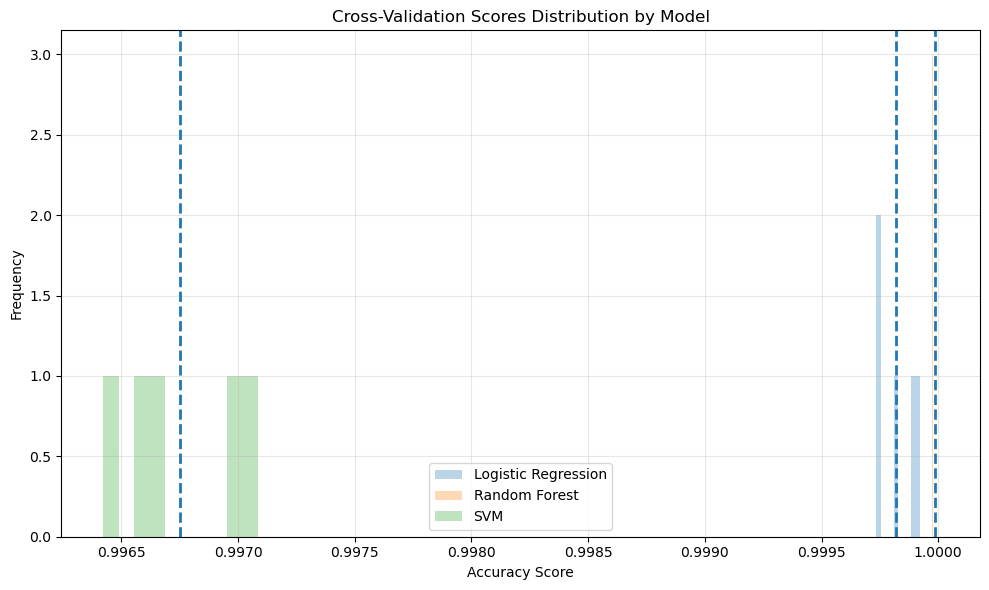

In [78]:
def visualize_cv_scores(cv_scores):
	"""
	Visualize cross-validation scores distribution.
	
	Parameters:
	-----------
	cv_scores : dict
		Dictionary containing model names and their CV scores
		
	Returns:
	--------
	None
		Displays plot of CV scores distribution with statistics
	"""
	plt.figure(figsize=(10, 6))
	
	# Plot distribution for each model
	for model_name, scores in cv_scores.items():
		mean_score = np.mean(scores)
		std_score = np.std(scores)
		
		# Plot histogram and statistics
		plt.hist(scores, bins=10, alpha=0.3, label=model_name)
		plt.axvline(mean_score, linestyle='dashed', linewidth=2)
		
		# Print statistics
		print(f"{model_name}: {mean_score:.3f} (+/- {std_score:.3f})")
	
	plt.title('Cross-Validation Scores Distribution by Model')
	plt.xlabel('Accuracy Score')
	plt.ylabel('Frequency')
	plt.grid(True, alpha=0.3)
	plt.legend()
	plt.tight_layout()
	plt.show()

# Visualize cross-validation results
visualize_cv_scores(cv_scores)

#### <font color='#FFB703'>Evaluation Metrics</font>

1. Accuracy
2. Precision
3. Recall
4. F1-Score

In [79]:
def evaluate_base_models():
	"""
	Evaluate the performance of base models using multiple metrics.
	
	Returns:
	--------
	pandas.DataFrame
		DataFrame containing evaluation metrics for each model:
		- Accuracy: Overall prediction accuracy
		- Precision: Precision score
		- Recall: Recall score
		- F1: F1 score
	"""
	# Define metrics to calculate
	metrics = {
		'Accuracy': accuracy_score,
		'Precision': precision_score,
		'Recall': recall_score,
		'F1': f1_score
	}
	
	# Calculate metrics for each model
	results = []
	for name, model in base_models.items():
		y_pred = model.predict(X_test)
		
		# Calculate metrics
		model_metrics = {
			'Model': name,
			**{
				metric_name: metric_func(y_test, y_pred) 
				for metric_name, metric_func in metrics.items()
			}
		}
		results.append(model_metrics)
	
	# Create DataFrame and format for display
	results_df = pd.DataFrame(results).set_index('Model')
	results_df = results_df.round(4)  # Round to 4 decimal places
	
	return results_df

# Run evaluation
evaluation_results = evaluate_base_models()
print("\nModel Evaluation Results:")
print(evaluation_results)


Model Evaluation Results:
                     Accuracy  Precision  Recall      F1
Model                                                   
Logistic Regression    0.9999     0.9998     1.0  0.9999
Random Forest          1.0000     1.0000     1.0  1.0000
SVM                    0.9963     0.9936     1.0  0.9968


Visualisation code takes _inspiration_ from https://github.com/Bytesthedust/Phishing_NaiveBayesML/blob/c9bae31d5830bf8e2de243dbfbdb371a7d7a6d5c/main.py under no licences

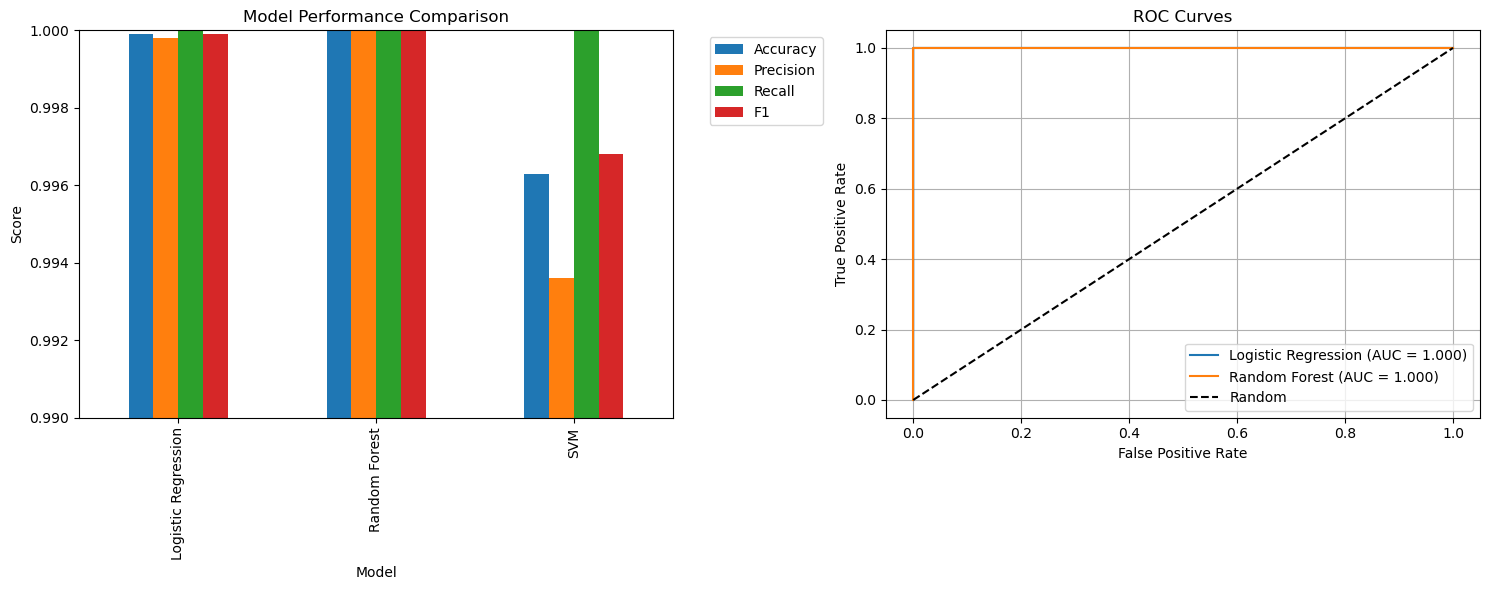

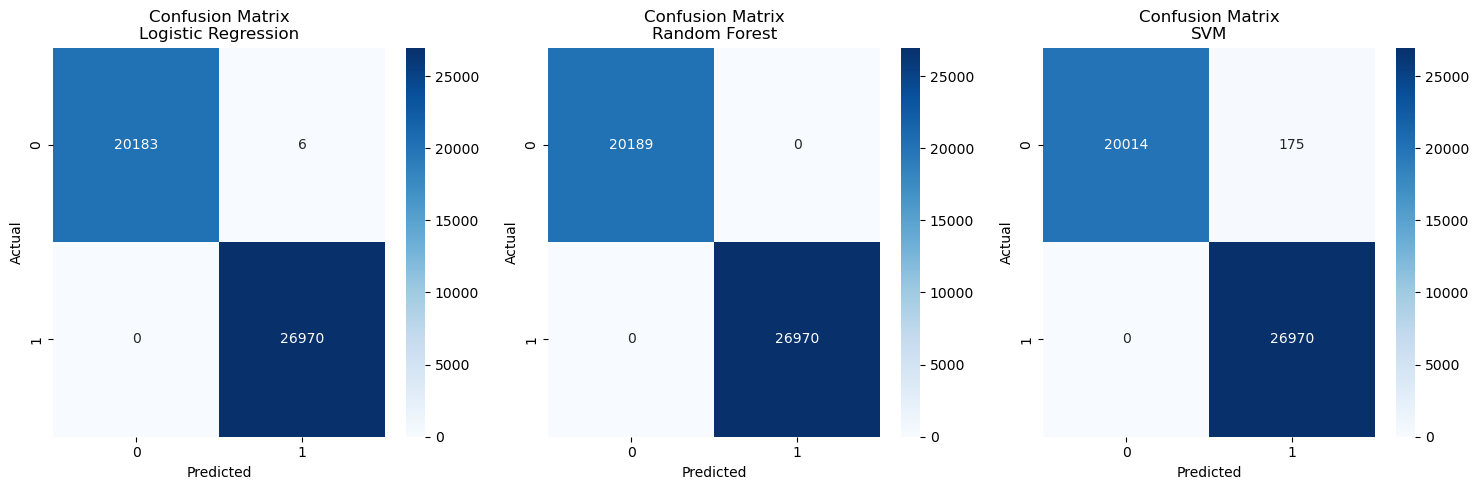

In [80]:
def visualize_model_performance(results_df):
	"""
	Visualize model performance using bar plots and ROC curves.
	
	Parameters:
	-----------
	results_df : pandas.DataFrame
		DataFrame containing model evaluation metrics (Accuracy, Precision, Recall, F1)
	"""
	# Create first figure for metrics comparison and ROC curves
	fig1 = plt.figure(figsize=(15, 6))
	
	# Plot 1: Metrics Comparison (Bar Plot)
	ax1 = plt.subplot(121)
	results_df.plot(kind='bar', ax=ax1)
	ax1.set_title('Model Performance Comparison')
	ax1.set_ylabel('Score')
	ax1.legend(bbox_to_anchor=(1.05, 1))
	ax1.set_ylim([0.99, 1.0])  # Focus on the relevant range
	
	# Plot 2: ROC Curves
	ax2 = plt.subplot(122)
	for name, model in base_models.items():
		if hasattr(model, "predict_proba"):
			# Get prediction probabilities
			y_pred_proba = model.predict_proba(X_test)[:, 1]
			
			# Calculate ROC curve
			fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
			roc_auc = auc(fpr, tpr)
			
			# Plot ROC curve
			ax2.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
	
	# Add diagonal line for random classifier
	ax2.plot([0, 1], [0, 1], 'k--', label='Random')
	ax2.set_xlabel('False Positive Rate')
	ax2.set_ylabel('True Positive Rate')
	ax2.set_title('ROC Curves')
	ax2.legend()
	ax2.grid(True)
	
	plt.tight_layout()
	plt.show()
	
	# Create second figure for confusion matrices
	fig2 = plt.figure(figsize=(15, 5))
	num_models = len(base_models)
	
	for i, (name, model) in enumerate(base_models.items(), 1):
		# Calculate confusion matrix
		y_pred = model.predict(X_test)
		cm = confusion_matrix(y_test, y_pred)
		
		# Create subplot for this model's confusion matrix
		plt.subplot(1, num_models, i)
		sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
		plt.title(f'Confusion Matrix\n{name}')
		plt.xlabel('Predicted')
		plt.ylabel('Actual')
	
	plt.tight_layout()
	plt.show()

# Generate visualizations
visualize_model_performance(evaluation_results)